#                                            Mudra Loan Risk Prediction

# Problem statement
Developing a predictive model to assess the risk of default for Mudra loan applicants. Using historical loan data, the model should classify loan applications as low-risk or high-risk based on various applicant and loan attributes.

Importing neccessary libaries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [6]:
df=pd.read_csv("training_dataset.csv.xls")

In [7]:
df

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
0,0,31-Jul-91,Existing,0,0,1991,Rs.33121600.0,STANDARD PARTS CORPORATION,No,Undefined,...,0,Rs.40640000.0,Rs.40640000.0,126,2-Apr-91,4419763001,1,Axis Bank Ltd.,No,0
1,1,30-Apr-06,New,0,6,2006,Rs.32735520.0,FRANK & KERI AMESTOY,No,Urban,...,451120,Rs.43647360.0,Rs.43647360.0,123,10-Apr-06,1709796003,1,Bandhan Bank Ltd.,0,1
2,2,30-Jun-04,Existing,4,0,2004,Rs.1422400.0,TELECOMMQC L L C,No,Urban,...,541618,Rs.2844800.0,Rs.5961400.32,90,25-May-04,7464754008,1,CSB Bank Limited,Yes,0
3,3,31-Jan-06,New,9,1,2006,Rs.2032000.0,"K & A AUTOMOTIVE, INC. DBA MUF",No,Urban,...,811112,Rs.4064000.0,Rs.4064000.0,126,21-Dec-05,1588745006,0,City Union Bank Ltd.,Yes,0
4,4,31-Dec-04,Existing,4,0,2005,Rs.22981920.0,SUNBEAM DELI,No,Urban,...,722211,Rs.30642560.0,Rs.30642560.0,104,2-Nov-04,8037734002,1,DCB Bank Ltd.,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,104995,31-Dec-98,New,0,0,1999,Rs.5136896.0,PURPOSE PUBLISHING,Yes,Undefined,...,541430,Rs.6421120.0,Rs.6421120.0,180,29-Oct-98,2421704001,1,Capital Small Finance Bank Ltd,0,0
104996,104996,30-Nov-03,New,0,0,2004,Rs.6908800.0,NANA BEAR'S QUILTS,Yes,Rural,...,451130,Rs.8128000.0,Rs.8128000.0,135,2-Oct-03,6752024001,1,Airtel Payments Bank Ltd,0,0
104997,104997,31-Mar-06,New,6,0,2006,Rs.812800.0,Pho 777,No,Urban,...,722110,Rs.1625600.0,Rs.1625600.0,34,28-Feb-06,1685875001,0,Karur Vysya Bank Ltd.,No,1
104998,104998,16-May-07,Existing,0,3,2007,Rs.10810240.0,FLEX TEMP CORPORATION dba LABO,No,Urban,...,561310,Rs.10810240.0,Rs.9916160.0,360,9-Jan-07,2617916010,1,Central Bank of India,0,0


Seeing dataset in vertical for proper analysis of columns

In [9]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,104990,104991,104992,104993,104994,104995,104996,104997,104998,104999
ID,0,1,2,3,4,5,6,7,8,9,...,104990,104991,104992,104993,104994,104995,104996,104997,104998,104999
Date_Of_Disbursement,31-Jul-91,30-Apr-06,30-Jun-04,31-Jan-06,31-Dec-04,30-Apr-06,10/31/2007 0:00,30-Apr-96,31-Aug-09,31-Jul-02,...,31-Jan-95,30-Apr-04,30-Sep-04,31-Oct-91,16-Apr-97,31-Dec-98,30-Nov-03,31-Mar-06,16-May-07,31-Dec-01
Business,Existing,New,Existing,New,Existing,Existing,New,Existing,New,Existing,...,Existing,Existing,New,Existing,Existing,New,New,New,Existing,New
Jobs_Reatained,0,0,4,9,4,3,3,0,1,20,...,0,0,1,0,0,0,0,6,0,0
Jobs_Created,0,6,0,1,0,0,3,0,3,2,...,0,0,3,0,6,0,0,0,3,0
Year_Of_Commitment,1991,2006,2004,2006,2005,2001,2007,1996,2007,2002,...,1995,2004,2004,1991,1995,1999,2004,2006,2007,2001
Guaranteed_Approved _Loan,Rs.33121600.0,Rs.32735520.0,Rs.1422400.0,Rs.2032000.0,Rs.22981920.0,Rs.203200.0,Rs.1016000.0,Rs.3352800.0,Rs.4925568.0,Rs.406400.0,...,Rs.11338560.0,Rs.3108960.0,Rs.1381760.0,Rs.541324.8,Rs.7884160.0,Rs.5136896.0,Rs.6908800.0,Rs.812800.0,Rs.10810240.0,Rs.10363200.0
Borrower_Name,STANDARD PARTS CORPORATION,FRANK & KERI AMESTOY,TELECOMMQC L L C,"K & A AUTOMOTIVE, INC. DBA MUF",SUNBEAM DELI,OFFICE REFRESHMENTS,"Diffusion Limited, LLC",VALI CINEMA & DRIVE IN,"J & K Fitness, Inc.",SALON PROGRESSIONS LLC,...,SURETY INSURANCE AGENCY INC,LOVELAND'S A-OK TRANSMISSION C,DOLLAR DAYZ LLC,KINGSLEY AVENUE ANIMAL HOSPITA,M/R HOLDING COMPANY,PURPOSE PUBLISHING,NANA BEAR'S QUILTS,Pho 777,FLEX TEMP CORPORATION dba LABO,"SOUTH MOUNTAIN FITNESS, A PART"
Low_Documentation_Loan,No,No,No,No,No,No,No,No,No,No,...,No,Yes,No,No,No,Yes,Yes,No,No,Yes
Demography,Undefined,Urban,Urban,Urban,Urban,Urban,Urban,Undefined,Urban,Urban,...,Undefined,Urban,Urban,Undefined,Undefined,Undefined,Rural,Urban,Urban,Urban


# Studing dataset

In [11]:
#checking data types of each columns
df.dtypes

ID                            int64
Date_Of_Disbursement         object
Business                     object
Jobs_Reatained                int64
Jobs_Created                  int64
Year_Of_Commitment           object
Guaranteed_Approved _Loan    object
Borrower_Name                object
Low_Documentation_Loan       object
Demography                   object
State_Of_Bank                object
ChargedOff_Amount            object
Borrower_City                object
Borrower_State               object
Gross_Amount_Balance         object
Count_Employees               int64
Classification_Code           int64
Loan_Approved_Gross          object
Gross_Amount_Disbursed       object
Loan_Term                     int64
Commitment_Date              object
Primary_Loan_Digit            int64
Code_Franchise                int64
Name_Of_Bank                 object
Revolving_Credit_Line        object
Default                       int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         105000 non-null  int64 
 1   Date_Of_Disbursement       104765 non-null  object
 2   Business                   104985 non-null  object
 3   Jobs_Reatained             105000 non-null  int64 
 4   Jobs_Created               105000 non-null  int64 
 5   Year_Of_Commitment         105000 non-null  object
 6   Guaranteed_Approved _Loan  105000 non-null  object
 7   Borrower_Name              104997 non-null  object
 8   Low_Documentation_Loan     104633 non-null  object
 9   Demography                 105000 non-null  object
 10  State_Of_Bank              105000 non-null  object
 11  ChargedOff_Amount          105000 non-null  object
 12  Borrower_City              105000 non-null  object
 13  Borrower_State             105000 non-null  

In [13]:
#seing total numbers of rows and columns
df.shape

(105000, 26)

In [14]:
#Checking the null Values
df.isnull().sum()

ID                             0
Date_Of_Disbursement         235
Business                      15
Jobs_Reatained                 0
Jobs_Created                   0
Year_Of_Commitment             0
Guaranteed_Approved _Loan      0
Borrower_Name                  3
Low_Documentation_Loan       367
Demography                     0
State_Of_Bank                  0
ChargedOff_Amount              0
Borrower_City                  0
Borrower_State                 0
Gross_Amount_Balance           0
Count_Employees                0
Classification_Code            0
Loan_Approved_Gross            0
Gross_Amount_Disbursed         0
Loan_Term                      0
Commitment_Date                0
Primary_Loan_Digit             0
Code_Franchise                 0
Name_Of_Bank                   0
Revolving_Credit_Line        491
Default                        0
dtype: int64

In [15]:
#checking duplicates
df.duplicated().sum()

0

# Data Cleaning

In [17]:
#Removing extra spaces present in the columns name
df.columns = df.columns.str.strip()


In [18]:
#ID:- This column does not contribute in models prediction
#Borrower_Name:- This column also do no help in models prediction
#Primary_loan_digit:- This is a column identifying each loan , it is like an id for the loan which also do not contribute in models prediction
#Borrower_State:-This is also not beneficial for us to do prediction

In [19]:
#Dropping unneccessary columns from the dataset
df.drop("ID",axis=1,inplace=True)
df.drop("Borrower_Name",axis=1,inplace=True)
df.drop("Primary_Loan_Digit",axis=1,inplace=True)
df.drop("Borrower_State",axis=1,inplace=True)


In [20]:
df.head().T

,0,1,2,3,4
Date_Of_Disbursement,31-Jul-91,30-Apr-06,30-Jun-04,31-Jan-06,31-Dec-04
Business,Existing,New,Existing,New,Existing
Jobs_Reatained,0,0,4,9,4
Jobs_Created,0,6,0,1,0
Year_Of_Commitment,1991,2006,2004,2006,2005
Guaranteed_Approved _Loan,Rs.33121600.0,Rs.32735520.0,Rs.1422400.0,Rs.2032000.0,Rs.22981920.0
Low_Documentation_Loan,No,No,No,No,No
Demography,Undefined,Urban,Urban,Urban,Urban
State_Of_Bank,AP,TR,AS,BR,TR
ChargedOff_Amount,Rs.0.0,Rs.38283367.68,Rs.0.0,Rs.0.0,Rs.22862519.68


In [21]:
#Removing Rs. from the columns in which it is present as because of the Rs sign numerical data is considered as object type
df['Guaranteed_Approved _Loan'] = df['Guaranteed_Approved _Loan'].replace({'Rs.': ''}, regex=True).astype(float)
df['ChargedOff_Amount'] = df['ChargedOff_Amount'].replace({'Rs.': ''}, regex=True).astype(float)
df['Loan_Approved_Gross'] = df['Loan_Approved_Gross'].replace({'Rs.': ''}, regex=True).astype(float)
df['Gross_Amount_Disbursed'] = df['Gross_Amount_Disbursed'].replace({'Rs.': ''}, regex=True).astype(float)
df['Gross_Amount_Balance'] = df['Gross_Amount_Balance'].replace({'Rs.': ''}, regex=True).astype(float)

In [22]:
df.head()

,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,...,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
0,31-Jul-91,Existing,0,0,1991,33121600.0,No,Undefined,AP,0.00,...,38,0,40640000.0,40640000.00,126,2-Apr-91,1,Axis Bank Ltd.,No,0
1,30-Apr-06,New,0,6,2006,32735520.0,No,Urban,TR,38283367.68,...,6,451120,43647360.0,43647360.00,123,10-Apr-06,1,Bandhan Bank Ltd.,0,1
2,30-Jun-04,Existing,4,0,2004,1422400.0,No,Urban,AS,0.00,...,4,541618,2844800.0,5961400.32,90,25-May-04,1,CSB Bank Limited,Yes,0
3,31-Jan-06,New,9,1,2006,2032000.0,No,Urban,BR,0.00,...,7,811112,4064000.0,4064000.00,126,21-Dec-05,0,City Union Bank Ltd.,Yes,0
4,31-Dec-04,Existing,4,0,2005,22981920.0,No,Urban,TR,22862519.68,...,4,722211,30642560.0,30642560.00,104,2-Nov-04,1,DCB Bank Ltd.,0,1


In [23]:
#converting the column [Date_Of_Disbursement] to date time format
col_dt=pd.to_datetime(df['Date_Of_Disbursement'], errors='coerce')
df["Date_Of_Disbursement"]=col_dt

In [24]:
#converting the column [Commitment_Date] to date time format
col_dt=pd.to_datetime(df['Commitment_Date'], errors='coerce')
df["Commitment_Date"]=col_dt

In [25]:
#IN the column [Year_Of_Commitment] at any index , the year has been given as 1976A replacing the value
df["Year_Of_Commitment"]=df["Year_Of_Commitment"].mask(df["Year_Of_Commitment"]=="1976A",1976)

In [26]:
df["Year_Of_Commitment"]=df["Year_Of_Commitment"].astype(int)

In [27]:
df["Year_Of_Commitment"]

0         1991
1         2006
2         2004
3         2006
4         2005
          ... 
104995    1999
104996    2004
104997    2006
104998    2007
104999    2001
Name: Year_Of_Commitment, Length: 105000, dtype: int32

# Null Values and Treatment Of Null values

In [29]:
#Checking null values in the dataset
df.isnull().sum()

Date_Of_Disbursement         235
Business                      15
Jobs_Reatained                 0
Jobs_Created                   0
Year_Of_Commitment             0
Guaranteed_Approved _Loan      0
Low_Documentation_Loan       367
Demography                     0
State_Of_Bank                  0
ChargedOff_Amount              0
Borrower_City                  0
Gross_Amount_Balance           0
Count_Employees                0
Classification_Code            0
Loan_Approved_Gross            0
Gross_Amount_Disbursed         0
Loan_Term                      0
Commitment_Date                0
Code_Franchise                 0
Name_Of_Bank                   0
Revolving_Credit_Line        491
Default                        0
dtype: int64

In [30]:
#filling null values by median
df['Date_Of_Disbursement'].fillna(df['Date_Of_Disbursement'].median(), inplace=True)

In [31]:
#Filling null values by mode
df["Business"] = df["Business"].fillna(df["Business"].mode()[0])

In [32]:
#filling null values by mode
df["Low_Documentation_Loan"] = df["Low_Documentation_Loan"].fillna(df["Low_Documentation_Loan"].mode()[0])

In [33]:
#filling null values by mode
df["Revolving_Credit_Line"] = df["Revolving_Credit_Line"].fillna(df["Revolving_Credit_Line"].mode()[0])

In [34]:
#checking null values are treated or not 
df.isnull().sum()

Date_Of_Disbursement         0
Business                     0
Jobs_Reatained               0
Jobs_Created                 0
Year_Of_Commitment           0
Guaranteed_Approved _Loan    0
Low_Documentation_Loan       0
Demography                   0
State_Of_Bank                0
ChargedOff_Amount            0
Borrower_City                0
Gross_Amount_Balance         0
Count_Employees              0
Classification_Code          0
Loan_Approved_Gross          0
Gross_Amount_Disbursed       0
Loan_Term                    0
Commitment_Date              0
Code_Franchise               0
Name_Of_Bank                 0
Revolving_Credit_Line        0
Default                      0
dtype: int64

Changing data type of datetime columns

In [36]:
#Changing the date time columns to numerical columns
df['Date_Of_Disbursement'] = df['Date_Of_Disbursement'].dt.strftime('%Y%m%d').astype(int)
df['Commitment_Date'] = df['Commitment_Date'].dt.strftime('%Y%m%d').astype(int)

# Seeing total unique values of categorical columns

In [38]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Unique values in Business:
['Existing' 'New' '0']

Unique values in Low_Documentation_Loan:
['No' 'Yes' 'S' '0' 'A' 'C' 'R']

Unique values in Demography:
['Undefined' 'Urban' 'Rural']

Unique values in State_Of_Bank:
['AP' 'TR' 'AS' 'BR' 'CG' 'AR' 'GJ' 'HR' 'HP' 'JK' 'JH' 'KA' 'KL' 'MP'
 'MH' 'LD' 'ML' 'MZ' 'NL' 'OR' 'PB' 'RJ' 'SK' 'UK' 'UP' 'WB' 'AN' 'CH'
 'DH' 'DD' 'DL' 'PY' 'GA' 'MN']

Unique values in Borrower_City:
['Mumbai' 'Delhi' 'Bengaluru' ... 'Warud' 'Asarganj' 'Sarsod']

Unique values in Name_Of_Bank:
['Axis Bank Ltd.' 'Bandhan Bank Ltd.' 'CSB Bank Limited'
 'City Union Bank Ltd.' 'DCB Bank Ltd.' 'Dhanlaxmi Bank Ltd.'
 'Federal Bank Ltd.' 'HDFC Bank Ltd' 'ICICI Bank Ltd.' 'IndusInd Bank Ltd'
 'IDFC FIRST Bank Limited' 'Jammu & Kashmir Bank Ltd.'
 'Karnataka Bank Ltd.' 'Karur Vysya Bank Ltd.' 'Kotak Mahindra Bank Ltd'
 'Nainital bank Ltd.' 'RBL Bank Ltd.' 'South Indian Bank Ltd.'
 'Tamilnad Mercantile Bank Ltd.' 'YES Bank Ltd.' 'IDBI Bank Limited'
 'Coastal Local Area Bank

cleaning the values 

In [40]:
df['Revolving_Credit_Line'] = df['Revolving_Credit_Line'].replace({'T' : 'Yes'})
df['Revolving_Credit_Line'] = df['Revolving_Credit_Line'].replace({'0': 'Yes'})
df['Revolving_Credit_Line'] = df['Revolving_Credit_Line'].replace({'R': 'Yes'})
df['Revolving_Credit_Line'] = df['Revolving_Credit_Line'].replace({'C': 'Yes'})
df['Revolving_Credit_Line'] = df['Revolving_Credit_Line'].replace({'1': 'Yes'})
df['Revolving_Credit_Line'] = df['Revolving_Credit_Line'].replace({'2': 'No'})
df['Revolving_Credit_Line'] = df['Revolving_Credit_Line'].replace({'4': 'No'})
df['Revolving_Credit_Line'] = df['Revolving_Credit_Line'].replace({'.': 'No'})
df['Revolving_Credit_Line'] = df['Revolving_Credit_Line'].replace({'': 'No'})
df['Revolving_Credit_Line'] = df['Revolving_Credit_Line'].str.replace("'","No",regex=False)

In [41]:
df["Revolving_Credit_Line"].value_counts()

Revolving_Credit_Line
Yes    56382
No     48616
`          2
Name: count, dtype: int64

In [42]:
df['Low_Documentation_Loan'] = df['Low_Documentation_Loan'].replace({'S' : 'Yes'})
df['Low_Documentation_Loan'] = df['Low_Documentation_Loan'].replace({'0' : 'Yes'})
df['Low_Documentation_Loan'] = df['Low_Documentation_Loan'].replace({'A' : 'Yes'})
df['Low_Documentation_Loan'] = df['Low_Documentation_Loan'].replace({'C' : 'No'})
df['Low_Documentation_Loan'] = df['Low_Documentation_Loan'].replace({'R' : 'No'})


In [43]:
df['Low_Documentation_Loan'].value_counts()

Low_Documentation_Loan
No     92597
Yes    12403
Name: count, dtype: int64

# Making individual columns for categorical and numerical

In [45]:
num_cols = ['Jobs_Reatained', 'Jobs_Created', 'Year_Of_Commitment','Guaranteed_Approved _Loan','ChargedOff_Amount','Gross_Amount_Balance',"Code_Franchise",
                   'Count_Employees', 'Classification_Code','Loan_Approved_Gross','Gross_Amount_Disbursed','Loan_Term','Date_Of_Disbursement','Commitment_Date']
cat_cols= ['Business', 'Low_Documentation_Loan','Demography','Borrower_City','Name_Of_Bank','Revolving_Credit_Line','Default']

In [46]:
num_df=df[num_cols]
cat_df=df[cat_cols]

In [47]:
num_df

,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,ChargedOff_Amount,Gross_Amount_Balance,Code_Franchise,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Date_Of_Disbursement,Commitment_Date
0,0,0,1991,33121600.0,0.00,0.0,1,38,0,40640000.0,40640000.00,126,19910731,19910402
1,0,6,2006,32735520.0,38283367.68,0.0,1,6,451120,43647360.0,43647360.00,123,20060430,20060410
2,4,0,2004,1422400.0,0.00,0.0,1,4,541618,2844800.0,5961400.32,90,20040630,20040525
3,9,1,2006,2032000.0,0.00,0.0,0,7,811112,4064000.0,4064000.00,126,20060131,20051221
4,4,0,2005,22981920.0,22862519.68,0.0,1,4,722211,30642560.0,30642560.00,104,20041231,20041102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,0,0,1999,5136896.0,0.00,0.0,1,1,541430,6421120.0,6421120.00,180,19981231,19981029
104996,0,0,2004,6908800.0,0.00,0.0,1,2,451130,8128000.0,8128000.00,135,20031130,20031002
104997,6,0,2006,812800.0,971296.00,0.0,0,5,722110,1625600.0,1625600.00,34,20060331,20060228
104998,0,3,2007,10810240.0,0.00,0.0,1,39,561310,10810240.0,9916160.00,360,20070516,20070109


In [48]:
cat_df

,Business,Low_Documentation_Loan,Demography,Borrower_City,Name_Of_Bank,Revolving_Credit_Line,Default
0,Existing,No,Undefined,Mumbai,Axis Bank Ltd.,No,0
1,New,No,Urban,Delhi,Bandhan Bank Ltd.,Yes,1
2,Existing,No,Urban,Bengaluru,CSB Bank Limited,Yes,0
3,New,No,Urban,Ahmedabad,City Union Bank Ltd.,Yes,0
4,Existing,No,Urban,Hyderabad,DCB Bank Ltd.,Yes,1
...,...,...,...,...,...,...,...
104995,New,Yes,Undefined,Motipur,Capital Small Finance Bank Ltd,Yes,0
104996,New,Yes,Rural,Warisaliganj,Airtel Payments Bank Ltd,Yes,0
104997,New,No,Urban,Nakodar,Karur Vysya Bank Ltd.,No,1
104998,Existing,No,Urban,Nasirabad,Central Bank of India,Yes,0


# EDA(Exploratory Data Analysis)

In [50]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Jobs_Reatained,105000.0,1.268865e+01,2.705442e+02,0.0,0.0,1.0,4.00,8.800000e+03
Jobs_Created,105000.0,1.037925e+01,2.703408e+02,0.0,0.0,0.0,1.00,8.800000e+03
Year_Of_Commitment,105000.0,2.001460e+03,5.963933e+00,1969.0,1997.0,2003.0,2006.00,2.014000e+03
Guaranteed_Approved _Loan,105000.0,1.151738e+07,1.818916e+07,40640.0,1625600.0,4226560.0,13167360.00,3.657600e+08
ChargedOff_Amount,105000.0,1.711913e+06,6.520106e+06,0.0,0.0,0.0,617016.80,1.625599e+08
Gross_Amount_Balance,105000.0,7.637843e+01,2.431197e+04,0.0,0.0,0.0,0.00,7.876682e+06
Code_Franchise,105000.0,2.707202e+03,1.266061e+04,0.0,0.0,1.0,1.00,9.200600e+04
Count_Employees,105000.0,9.904248e+00,5.815706e+01,0.0,2.0,4.0,9.00,7.200000e+03
Classification_Code,105000.0,4.059183e+05,2.603360e+05,0.0,236115.0,447110.0,561740.00,9.281200e+05
Loan_Approved_Gross,105000.0,1.492200e+07,2.262852e+07,81280.0,2600960.0,6502400.0,16906240.00,4.064000e+08


In [51]:
df.describe(include="object")

,Business,Low_Documentation_Loan,Demography,State_Of_Bank,Borrower_City,Name_Of_Bank,Revolving_Credit_Line
count,105000,105000,105000,105000,105000,105000,105000
unique,3,2,3,34,1193,143,3
top,Existing,No,Urban,TR,Jhansi,ICICI Bank Ltd.,Yes
freq,75106,92597,57598,15552,1504,11215,56382


In [52]:
num_df.skew()

Jobs_Reatained                32.339747
Jobs_Created                  32.414642
Year_Of_Commitment            -0.756220
Guaranteed_Approved _Loan      3.875729
ChargedOff_Amount              8.905229
Gross_Amount_Balance         323.878716
Code_Franchise                 5.025109
Count_Employees               68.079152
Classification_Code           -0.296288
Loan_Approved_Gross            3.786055
Gross_Amount_Disbursed         4.236424
Loan_Term                      1.207777
Date_Of_Disbursement          -0.139802
Commitment_Date               -0.118451
dtype: float64

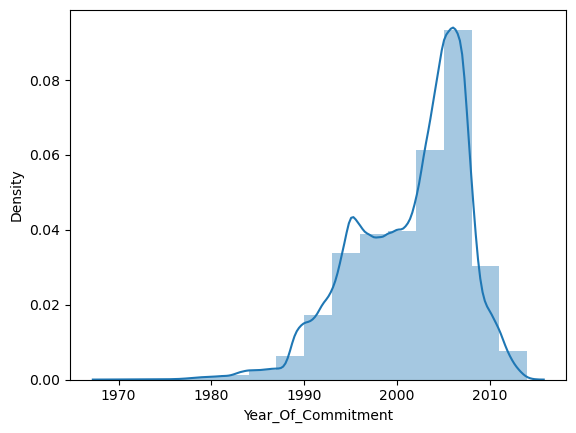

In [53]:
sns.distplot(num_df["Year_Of_Commitment"],bins=15,kde=True)
plt.show()
#years_Of_commitment is left skewed , the loans are highly committed between the years 1990 to 2010

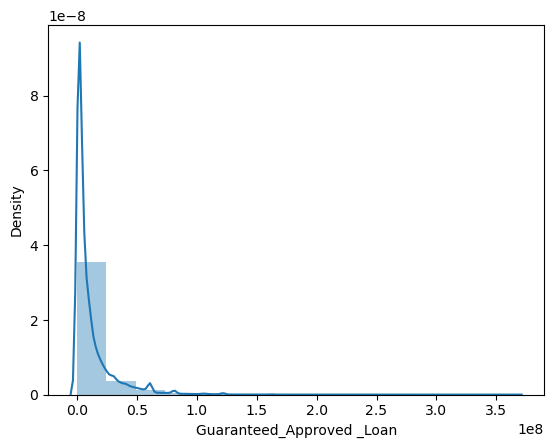

In [54]:
sns.distplot(num_df["Guaranteed_Approved _Loan"],bins=15,kde=True)
plt.show()
#This column contaiining high numerical values and it is right skewwed

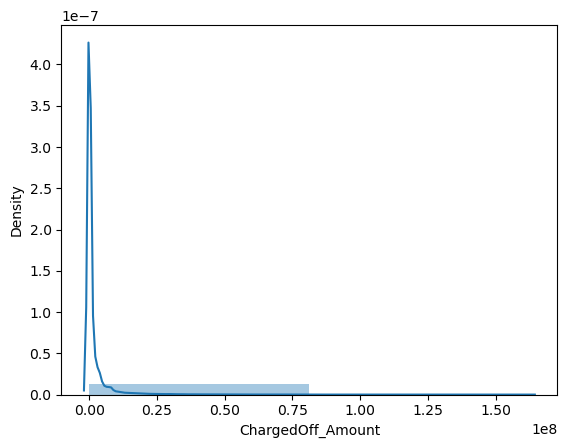

In [55]:
sns.distplot(num_df["ChargedOff_Amount"],bins=2,kde=True)
plt.show()
#This column is also very skewwed towards right

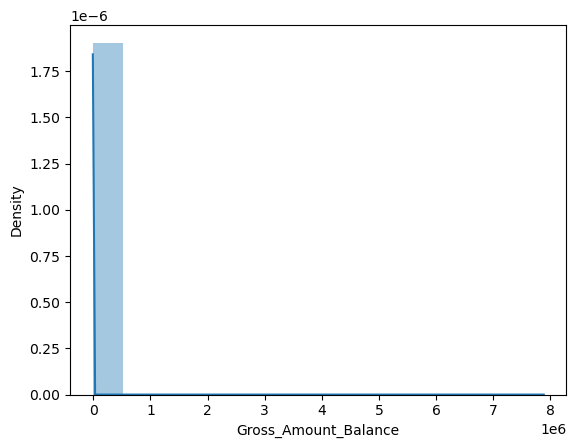

In [56]:
sns.distplot(num_df["Gross_Amount_Balance"],bins=15,kde=True)
plt.show()
#This column only containing two values and rest are '0' hence making it very highly skewwwed

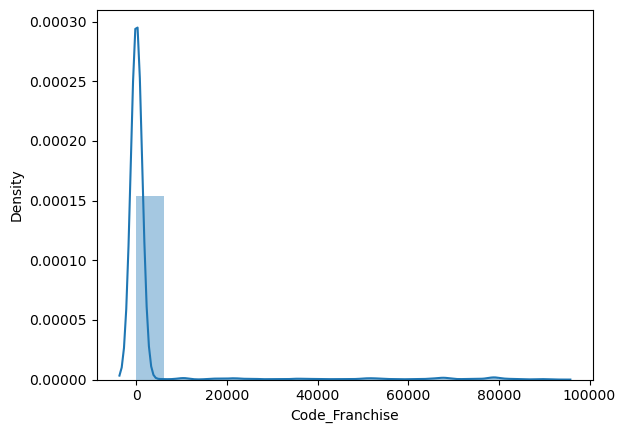

In [57]:
sns.distplot(num_df["Code_Franchise"],bins=15,kde=True)
plt.show()
#This column is skewwed towards right side

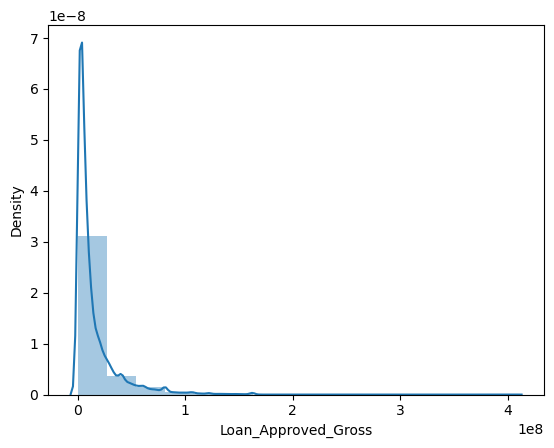

In [58]:
sns.distplot(num_df["Loan_Approved_Gross"],bins=15,kde=True)
plt.show()
#This column containing high numerical values and skewwed towards right

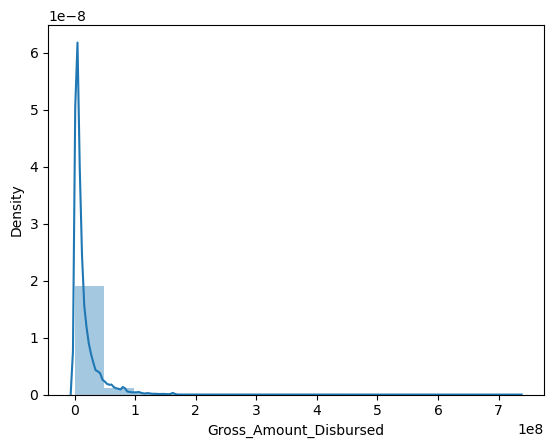

In [59]:
sns.distplot(num_df["Gross_Amount_Disbursed"],bins=15,kde=True)
plt.show()

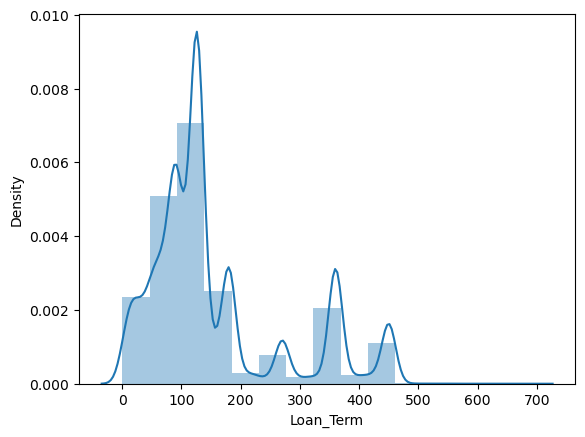

In [60]:
sns.distplot(num_df["Loan_Term"],bins=15,kde=True)
plt.show()

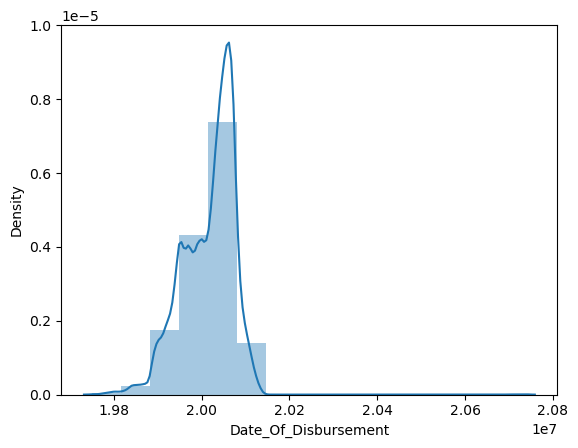

In [61]:
sns.distplot(num_df["Date_Of_Disbursement"],bins=15,kde=True)
plt.show()

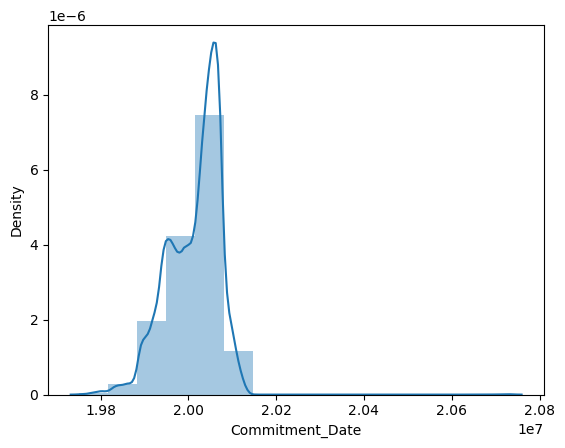

In [62]:
sns.distplot(num_df["Commitment_Date"],bins=15,kde=True)
plt.show()

# Outliers

Plotting box plot to check outliers

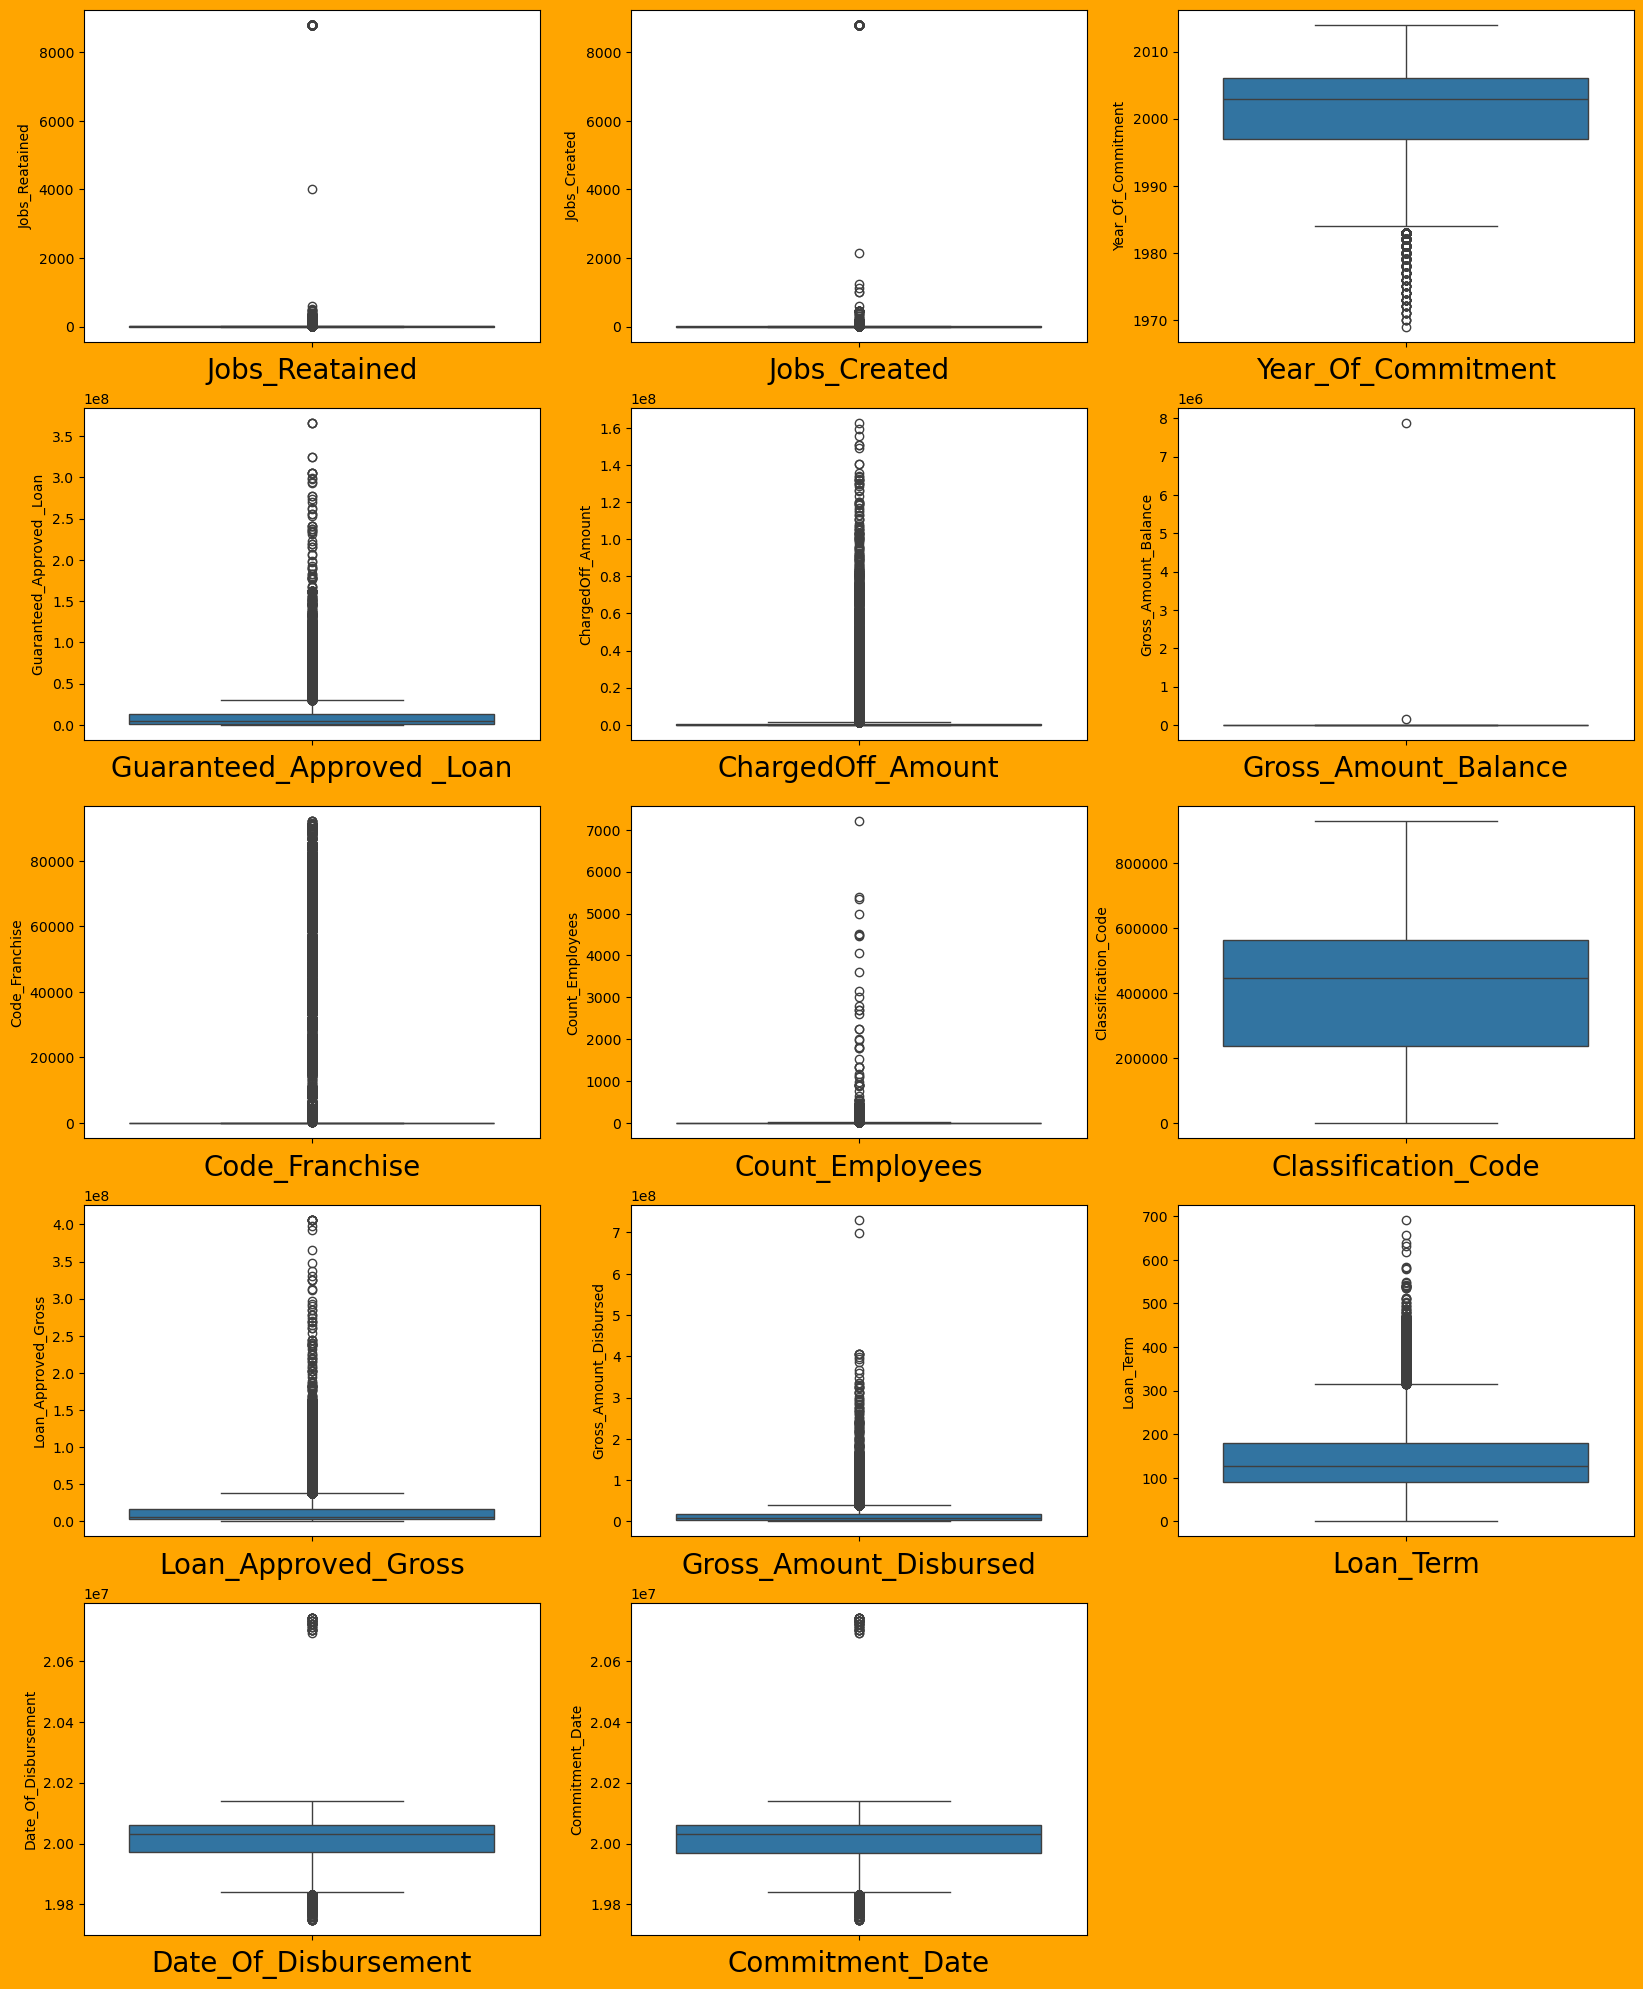

In [65]:
plt.figure(figsize=(20,25), facecolor='orange')
plotnumber =1
for column in num_df:
    if plotnumber <=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(num_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [66]:
#There are many columns which contains outliers they should be treated by log or either by cbrt or iqr

In [67]:
out_col=num_df[["Jobs_Reatained","Jobs_Created","Count_Employees","Date_Of_Disbursement","Commitment_Date","Code_Franchise"]]
num_df_1=num_df[["Year_Of_Commitment","Guaranteed_Approved _Loan","Loan_Approved_Gross","Gross_Amount_Disbursed","Loan_Term"
                 ,"ChargedOff_Amount","Gross_Amount_Balance","Classification_Code"]]


In [68]:
#out_col must be treated by IQR method as these values are not much more important for us 
for col in out_col:
    Q1 = out_col[col].quantile(0.25)
    Q3 = out_col[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    print(col,":-")
    print("lower_bound","=",lower_bound)
    upper_bound = Q3 + 1.5 * IQR
    print("upper_bound","=",upper_bound)
    
    out_col[col] = np.where(out_col[col] < lower_bound, lower_bound,
                         np.where(out_col[col] > upper_bound, upper_bound, out_col[col]))

Jobs_Reatained :-
lower_bound = -6.0
upper_bound = 10.0
Jobs_Created :-
lower_bound = -1.5
upper_bound = 2.5
Count_Employees :-
lower_bound = -8.5
upper_bound = 19.5
Date_Of_Disbursement :-
lower_bound = 19836632.5
upper_bound = 20195028.5
Commitment_Date :-
lower_bound = 19835649.5
upper_bound = 20195293.5
Code_Franchise :-
lower_bound = -1.5
upper_bound = 2.5


In [69]:
#Concating the out_col by num_df_1
num_df_2=pd.concat([num_df_1,out_col], axis=1)

In [70]:
# These columns values can effect the prediction if we remove by IQR so using log transformation p which will add 1 to all values before doing log transformation
num_df_2[["Guaranteed_Approved _Loan","Loan_Approved_Gross","Gross_Amount_Disbursed","Loan_Term"
                 ,"ChargedOff_Amount","Gross_Amount_Balance"]]=np.log1p(num_df_2[["Guaranteed_Approved _Loan","Loan_Approved_Gross","Gross_Amount_Disbursed","Loan_Term"
                 ,"ChargedOff_Amount","Gross_Amount_Balance"]])

In [71]:
#Checking skewness 
num_df_2.skew()

Year_Of_Commitment            -0.756220
Guaranteed_Approved _Loan      0.035936
Loan_Approved_Gross            0.044742
Gross_Amount_Disbursed        -0.036499
Loan_Term                     -1.156888
ChargedOff_Amount              1.009108
Gross_Amount_Balance         236.042011
Classification_Code           -0.296288
Jobs_Reatained                 1.217373
Jobs_Created                   1.107355
Count_Employees                1.194674
Date_Of_Disbursement          -0.665024
Commitment_Date               -0.652075
Code_Franchise                 0.581386
dtype: float64

In [72]:
#The skewness of this column is very high after transformation so deleting this column
num_df_2.drop("Gross_Amount_Balance",axis=1,inplace=True)

Plotting box plot to check outliers

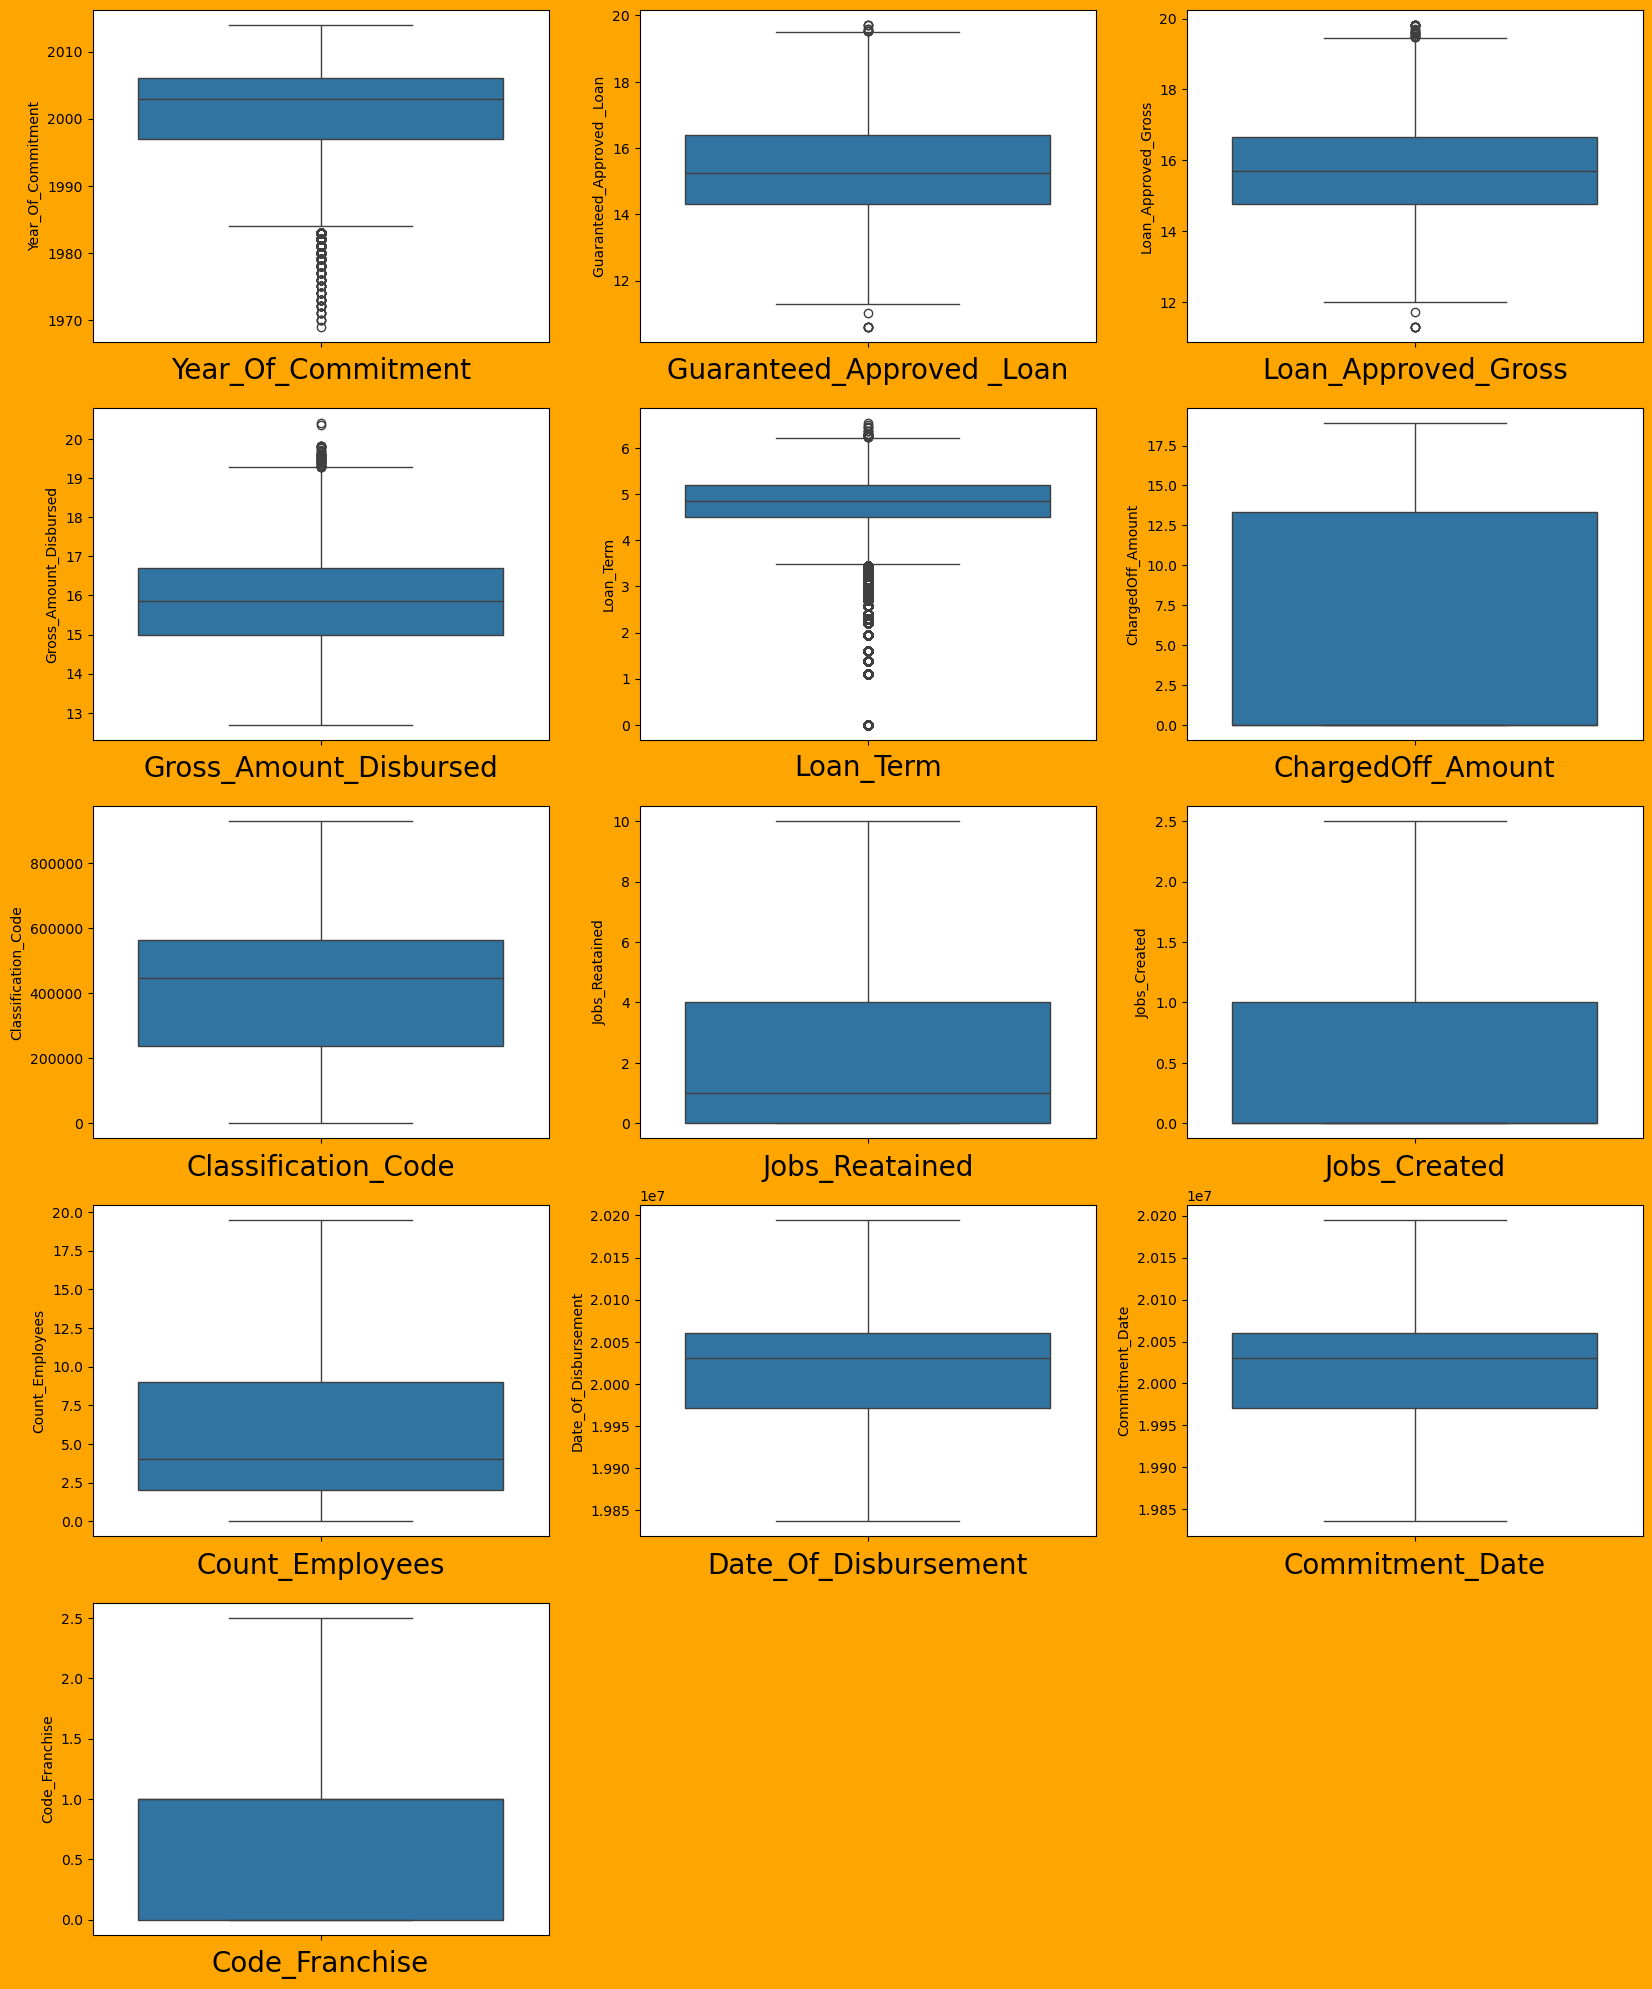

In [74]:
plt.figure(figsize=(20,25), facecolor='orange')
plotnumber =1
for column in num_df_2:
    if plotnumber <=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(num_df_2[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [75]:
num_df_2.skew()

Year_Of_Commitment          -0.756220
Guaranteed_Approved _Loan    0.035936
Loan_Approved_Gross          0.044742
Gross_Amount_Disbursed      -0.036499
Loan_Term                   -1.156888
ChargedOff_Amount            1.009108
Classification_Code         -0.296288
Jobs_Reatained               1.217373
Jobs_Created                 1.107355
Count_Employees              1.194674
Date_Of_Disbursement        -0.665024
Commitment_Date             -0.652075
Code_Franchise               0.581386
dtype: float64

In [76]:
num_df_2.reset_index()

,index,Year_Of_Commitment,Guaranteed_Approved _Loan,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,ChargedOff_Amount,Classification_Code,Jobs_Reatained,Jobs_Created,Count_Employees,Date_Of_Disbursement,Commitment_Date,Code_Franchise
0,0,1991,17.315696,17.520263,17.520263,4.844187,0.000000,0,0.0,0.0,19.5,19910731.0,19910402.0,1.0
1,1,2006,17.303971,17.591653,17.591653,4.820282,17.460526,451120,0.0,2.5,6.0,20060430.0,20060410.0,1.0
2,2,2004,14.167857,14.861004,15.600816,4.510860,0.000000,541618,4.0,0.0,4.0,20040630.0,20040525.0,1.0
3,3,2006,14.524532,15.217679,15.217679,4.844187,0.000000,811112,9.0,1.0,7.0,20060131.0,20051221.0,0.0
4,4,2005,16.950218,17.237900,17.237900,4.653960,16.945009,722211,4.0,0.0,4.0,20041231.0,20041102.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,104995,1999,15.451960,15.675103,15.675103,5.198497,0.000000,541430,0.0,0.0,1.0,19981231.0,19981029.0,1.0
104996,104996,2004,15.748307,15.910826,15.910826,4.912655,0.000000,451130,0.0,0.0,2.0,20031130.0,20031002.0,1.0
104997,104997,2006,13.608242,14.301388,14.301388,3.555348,13.786388,722110,6.0,0.0,5.0,20060331.0,20060228.0,0.0
104998,104998,2007,16.196004,16.196004,16.109676,5.888878,0.000000,561310,0.0,2.5,19.5,20070516.0,20070109.0,1.0


In [77]:
#concating numerical columns with categorical columns
df_clnd= pd.concat([num_df_2,cat_df], axis=1)


In [78]:
df_clnd

,Year_Of_Commitment,Guaranteed_Approved _Loan,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,ChargedOff_Amount,Classification_Code,Jobs_Reatained,Jobs_Created,Count_Employees,Date_Of_Disbursement,Commitment_Date,Code_Franchise,Business,Low_Documentation_Loan,Demography,Borrower_City,Name_Of_Bank,Revolving_Credit_Line,Default
0,1991,17.315696,17.520263,17.520263,4.844187,0.000000,0,0.0,0.0,19.5,19910731.0,19910402.0,1.0,Existing,No,Undefined,Mumbai,Axis Bank Ltd.,No,0
1,2006,17.303971,17.591653,17.591653,4.820282,17.460526,451120,0.0,2.5,6.0,20060430.0,20060410.0,1.0,New,No,Urban,Delhi,Bandhan Bank Ltd.,Yes,1
2,2004,14.167857,14.861004,15.600816,4.510860,0.000000,541618,4.0,0.0,4.0,20040630.0,20040525.0,1.0,Existing,No,Urban,Bengaluru,CSB Bank Limited,Yes,0
3,2006,14.524532,15.217679,15.217679,4.844187,0.000000,811112,9.0,1.0,7.0,20060131.0,20051221.0,0.0,New,No,Urban,Ahmedabad,City Union Bank Ltd.,Yes,0
4,2005,16.950218,17.237900,17.237900,4.653960,16.945009,722211,4.0,0.0,4.0,20041231.0,20041102.0,1.0,Existing,No,Urban,Hyderabad,DCB Bank Ltd.,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,1999,15.451960,15.675103,15.675103,5.198497,0.000000,541430,0.0,0.0,1.0,19981231.0,19981029.0,1.0,New,Yes,Undefined,Motipur,Capital Small Finance Bank Ltd,Yes,0
104996,2004,15.748307,15.910826,15.910826,4.912655,0.000000,451130,0.0,0.0,2.0,20031130.0,20031002.0,1.0,New,Yes,Rural,Warisaliganj,Airtel Payments Bank Ltd,Yes,0
104997,2006,13.608242,14.301388,14.301388,3.555348,13.786388,722110,6.0,0.0,5.0,20060331.0,20060228.0,0.0,New,No,Urban,Nakodar,Karur Vysya Bank Ltd.,No,1
104998,2007,16.196004,16.196004,16.109676,5.888878,0.000000,561310,0.0,2.5,19.5,20070516.0,20070109.0,1.0,Existing,No,Urban,Nasirabad,Central Bank of India,Yes,0


# Data Visualization

# Histplot

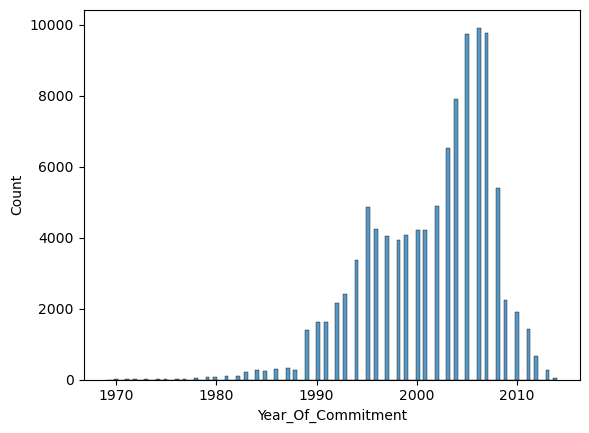

In [81]:
sns.histplot(df_clnd["Year_Of_Commitment"])
plt.show()

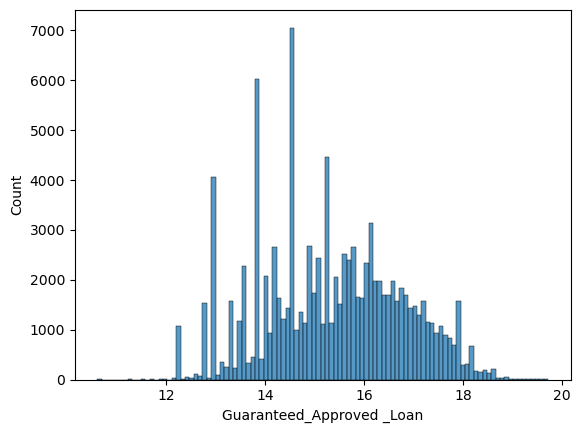

In [82]:
sns.histplot(df_clnd["Guaranteed_Approved _Loan"])
plt.show()

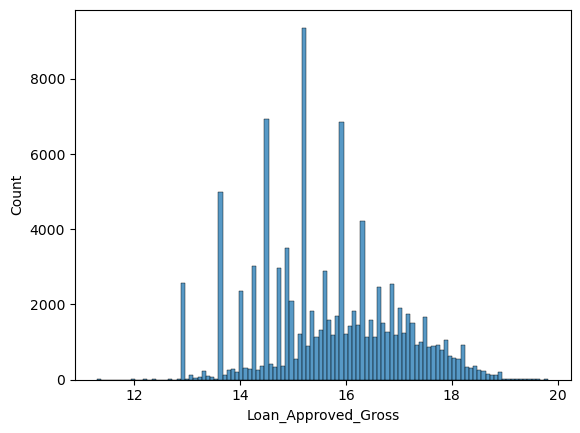

In [83]:
sns.histplot(df_clnd["Loan_Approved_Gross"])
plt.show()

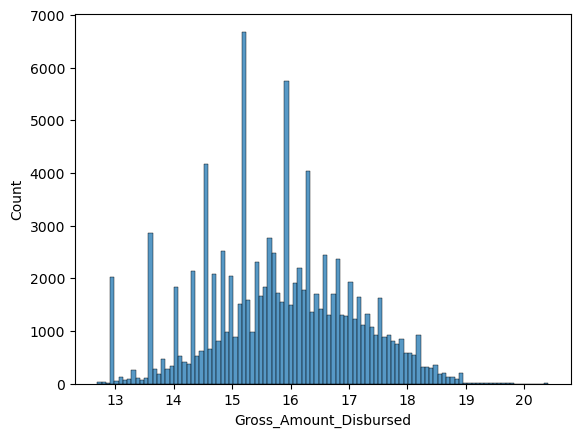

In [84]:
sns.histplot(df_clnd["Gross_Amount_Disbursed"])
plt.show()

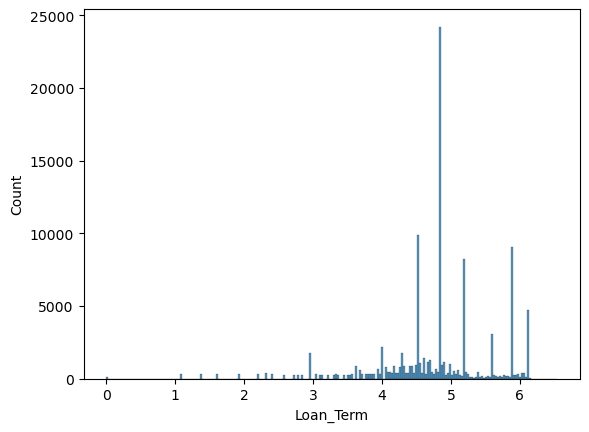

In [85]:
sns.histplot(df_clnd["Loan_Term"])
plt.show()

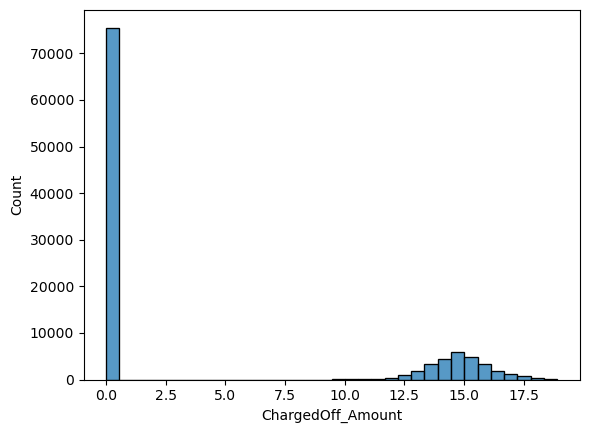

In [86]:
sns.histplot(df_clnd["ChargedOff_Amount"])
plt.show()

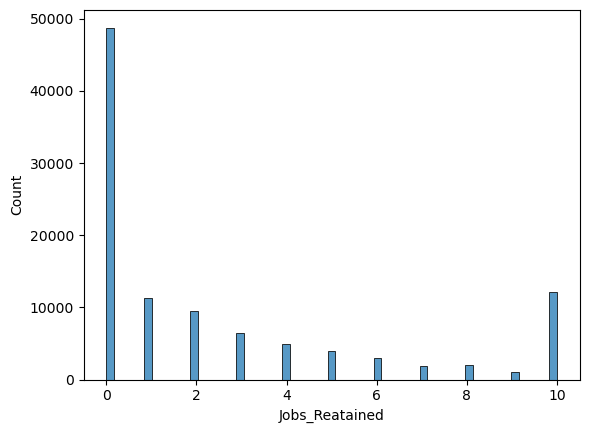

In [87]:
sns.histplot(df_clnd["Jobs_Reatained"])
plt.show()	

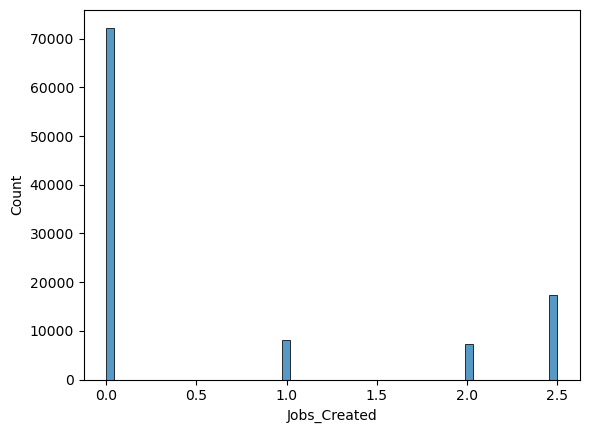

In [88]:
sns.histplot(df_clnd["Jobs_Created"])
plt.show()	

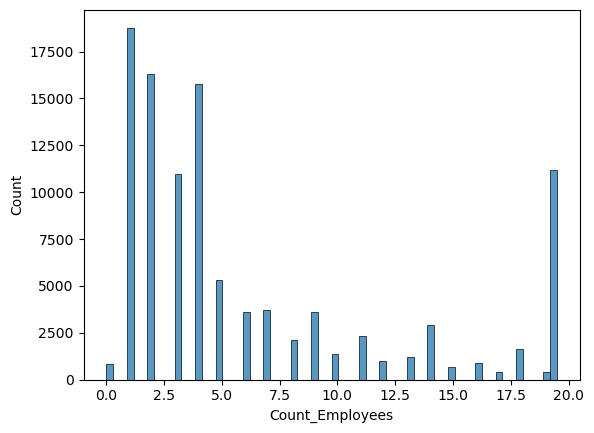

In [89]:
sns.histplot(df_clnd["Count_Employees"])
plt.show()	

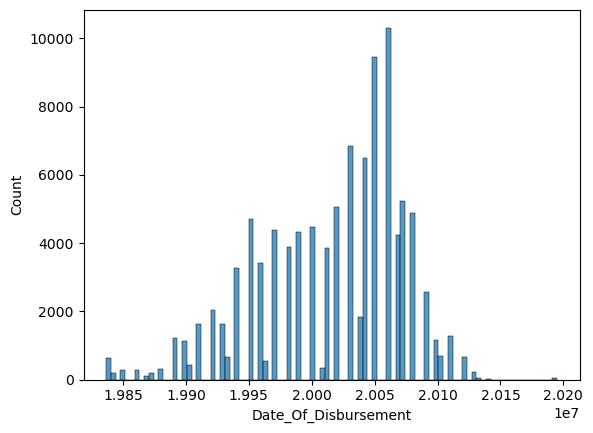

In [90]:
sns.histplot(df_clnd["Date_Of_Disbursement"])
plt.show()	

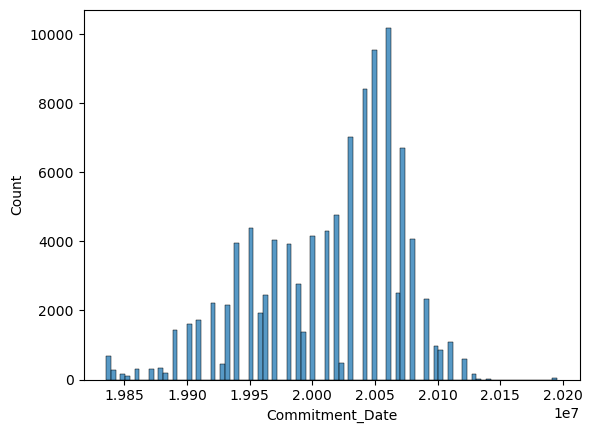

In [91]:
sns.histplot(df_clnd["Commitment_Date"])
plt.show()	

# Countplot

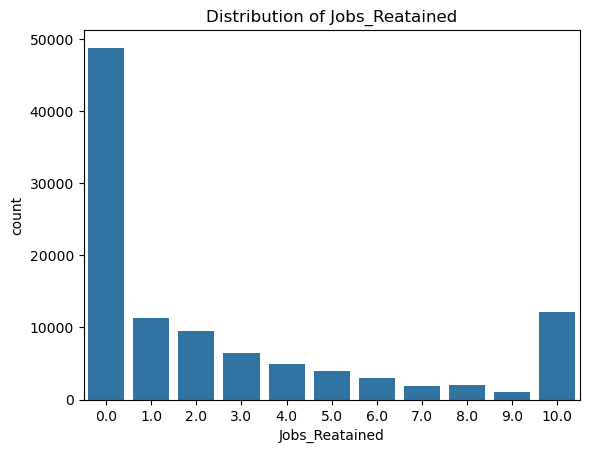

In [93]:
sns.countplot(x="Jobs_Reatained", data=df_clnd)  
plt.title("Distribution of Jobs_Reatained")
plt.show()

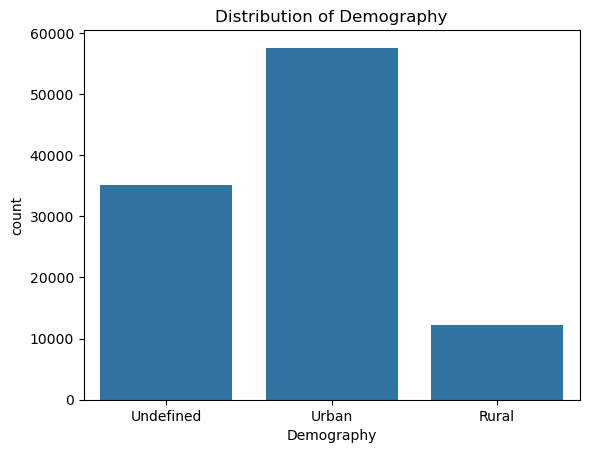

In [94]:
sns.countplot(x="Demography", data=df_clnd) 
plt.title("Distribution of Demography")
plt.show()

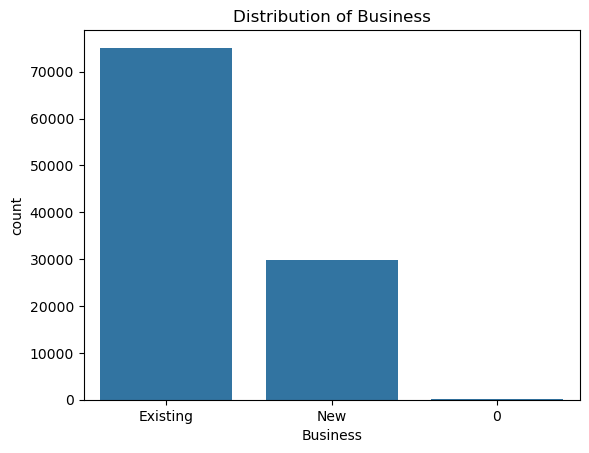

In [95]:
sns.countplot(x="Business", data=df_clnd) 
plt.title("Distribution of Business")
plt.show()

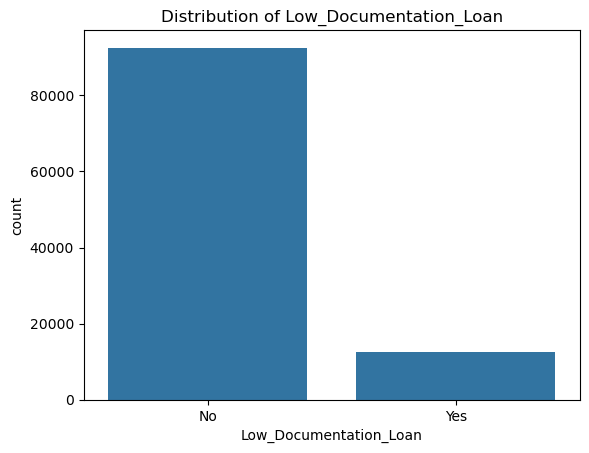

In [96]:
sns.countplot(x="Low_Documentation_Loan", data=df_clnd)  # kde=True adds a density curve
plt.title("Distribution of Low_Documentation_Loan")
plt.show()

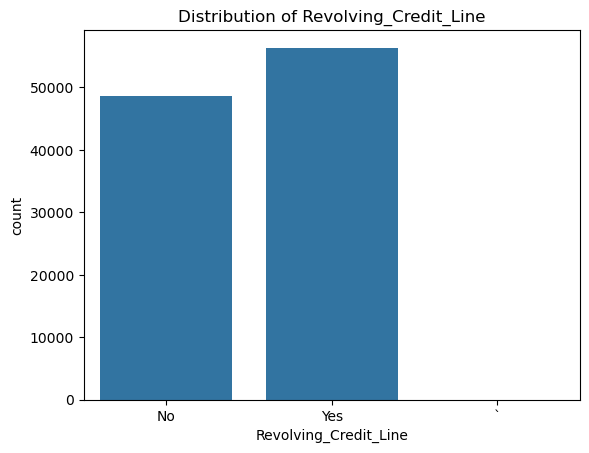

In [97]:
sns.countplot(x="Revolving_Credit_Line", data=df_clnd)  
plt.title("Distribution of Revolving_Credit_Line")
plt.show()

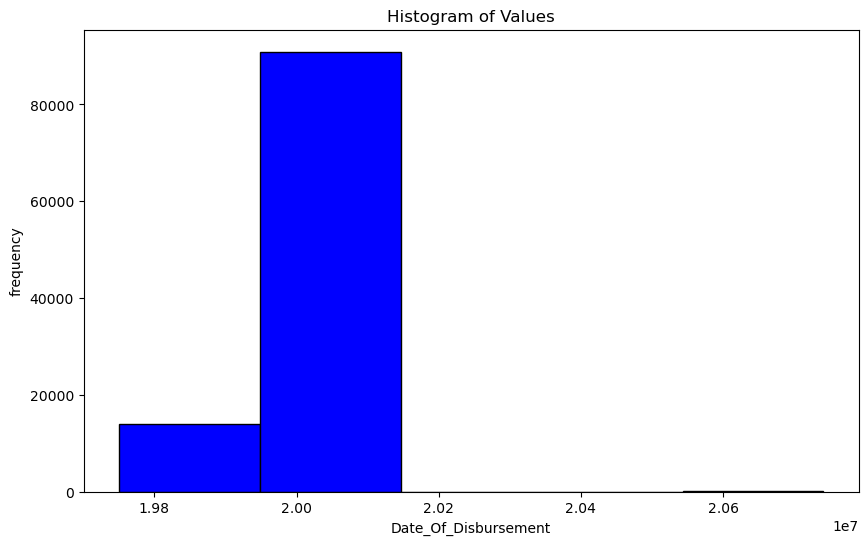

In [98]:
plt.figure(figsize=(10,6))
plt.hist(df['Date_Of_Disbursement'], bins=5, color='blue', edgecolor='black')
plt.xlabel('Date_Of_Disbursement')
plt.ylabel('frequency')
plt.title('Histogram of Values')
plt.show()

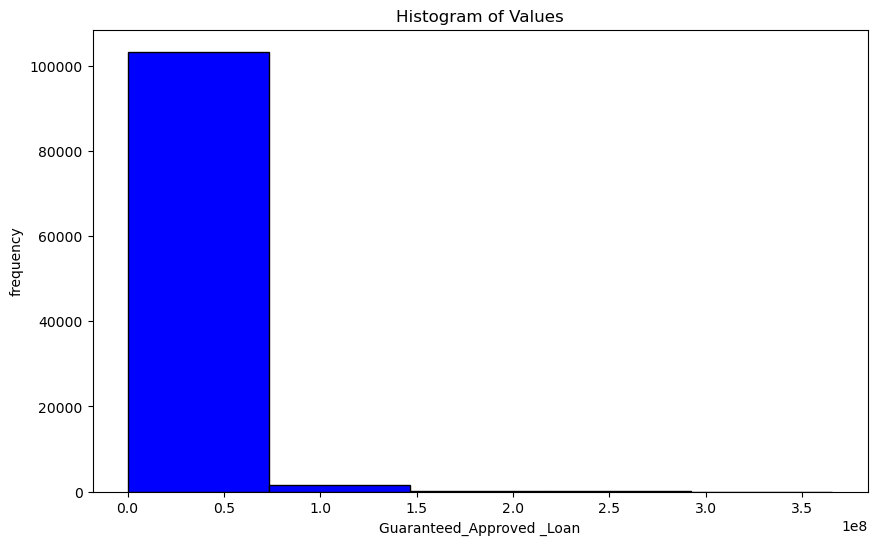

In [99]:
plt.figure(figsize=(10,6))
plt.hist(df['Guaranteed_Approved _Loan'], bins=5, color='blue', edgecolor='black')
plt.xlabel('Guaranteed_Approved _Loan')
plt.ylabel('frequency')
plt.title('Histogram of Values')
plt.show()

# Bivariant analysis

scatter plot

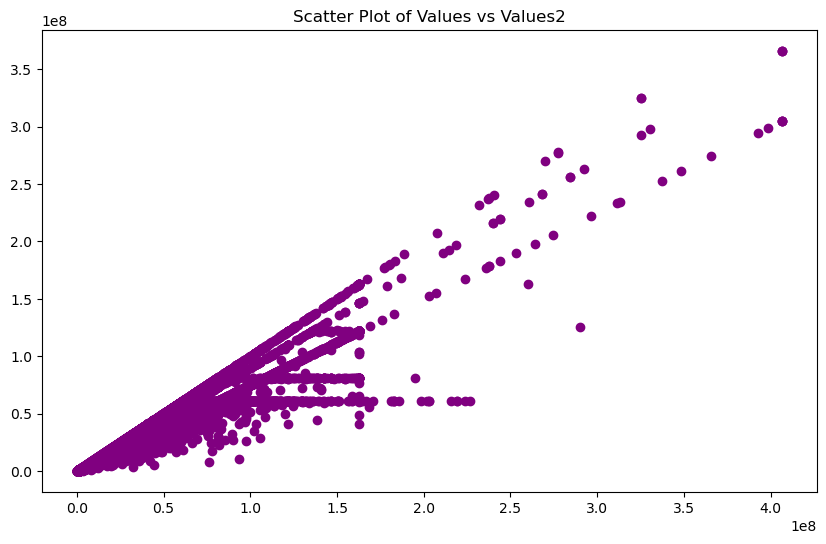

In [102]:
plt.figure(figsize=(10,6))
plt.scatter(df['Loan_Approved_Gross'], df['Guaranteed_Approved _Loan'], color='purple')
plt.title('Scatter Plot of Values vs Values2')
plt.show()

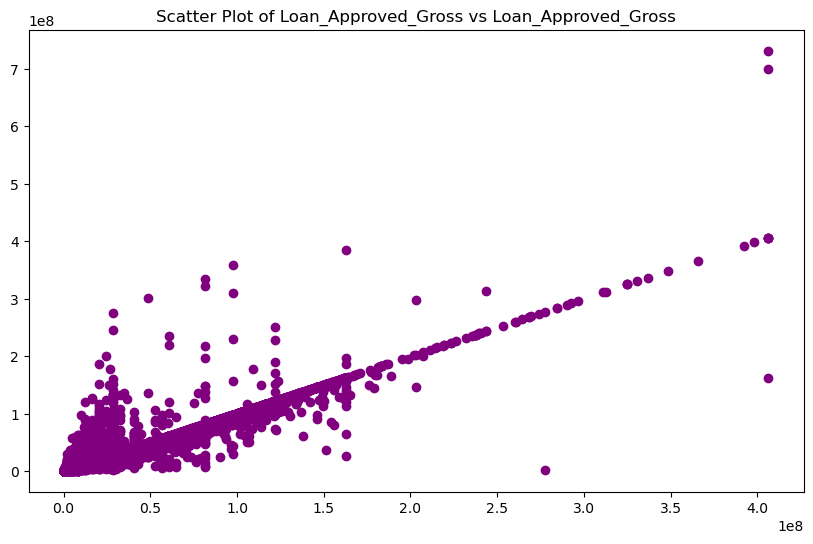

In [103]:
plt.figure(figsize=(10,6))
plt.scatter(df['Loan_Approved_Gross'], df['Gross_Amount_Disbursed'], color='purple')
plt.title('Scatter Plot of Loan_Approved_Gross vs Loan_Approved_Gross')
plt.show()

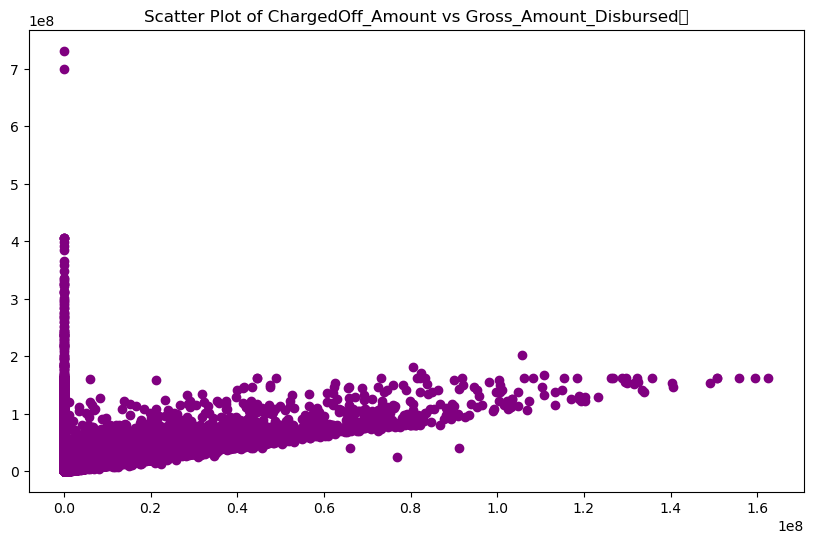

In [104]:
plt.figure(figsize=(10,6))
plt.scatter(df['ChargedOff_Amount'], df['Gross_Amount_Disbursed'], color='purple')
plt.title('Scatter Plot of ChargedOff_Amount vs Gross_Amount_Disbursed	')
plt.show()

This shows that almost loans are not charged off or charged off at very low ammount

# Line plot

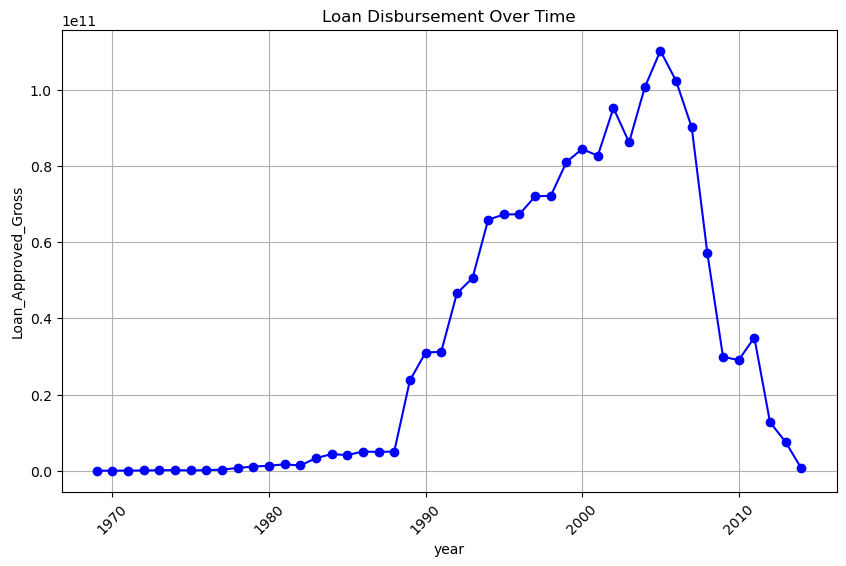

In [107]:
df_grouped = df.groupby('Year_Of_Commitment')['Loan_Approved_Gross'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['Year_Of_Commitment'], df_grouped['Loan_Approved_Gross'], marker='o', linestyle='-', color='b')
plt.xlabel('year')
plt.ylabel('Loan_Approved_Gross')
plt.title('Loan Disbursement Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

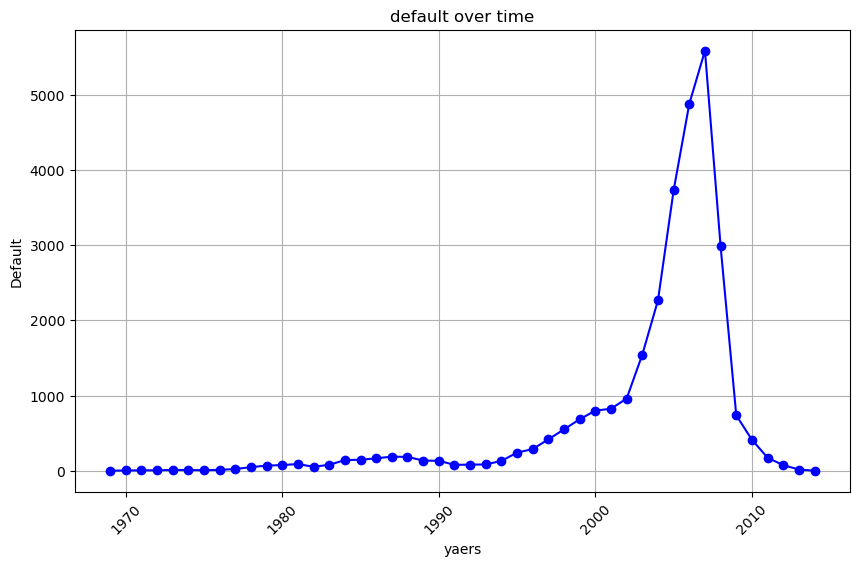

In [108]:
df_grouped = df.groupby('Year_Of_Commitment')['Default'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['Year_Of_Commitment'], df_grouped['Default'], marker='o', linestyle='-', color='b')
plt.xlabel('yaers')
plt.ylabel('Default')
plt.title('default over time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

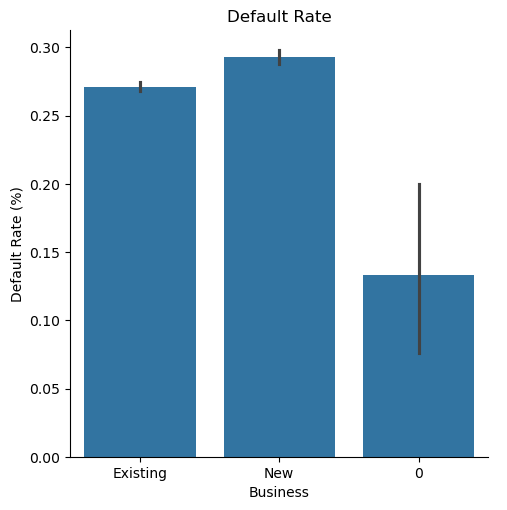

In [109]:
sns.catplot(x="Business", y="Default", kind="bar", data=df_clnd)
plt.title("Default Rate")
plt.ylabel("Default Rate (%)")
plt.show()

Bussines that are new are more defaulter

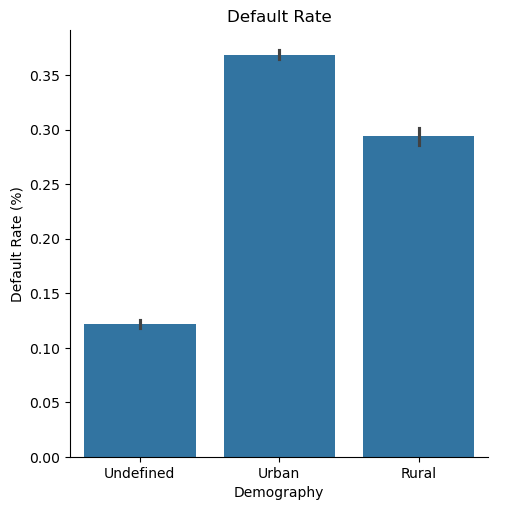

In [111]:
sns.catplot(x="Demography", y="Default", kind="bar", data=df_clnd)
plt.title("Default Rate")
plt.ylabel("Default Rate (%)")
plt.show()

Urban areas have more defaulters

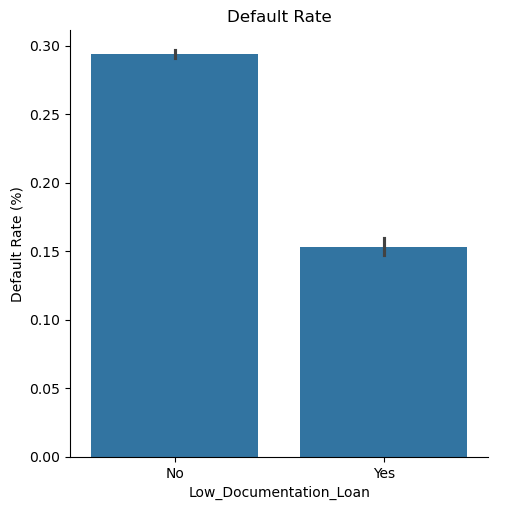

In [113]:
sns.catplot(x="Low_Documentation_Loan", y="Default", kind="bar", data=df_clnd)
plt.title("Default Rate")
plt.ylabel("Default Rate (%)")
plt.show()

In [114]:
#sns.pairplot(df_clnd, hue="Default")
#plt.show()

# Encoding

In [116]:
from category_encoders import BinaryEncoder

In [117]:
Bi=BinaryEncoder()

In [118]:
bi_1=Bi.fit_transform(df_clnd['Business'])
bi_2=Bi.fit_transform(df_clnd['Demography'])
bi_3=Bi.fit_transform(df_clnd['Low_Documentation_Loan'])

In [119]:
bi_1

,Business_0,Business_1
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
104995,1,0
104996,1,0
104997,1,0
104998,0,1


In [120]:
bi_2

,Demography_0,Demography_1
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
104995,0,1
104996,1,1
104997,1,0
104998,1,0


In [121]:
bi_3

,Low_Documentation_Loan_0,Low_Documentation_Loan_1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
104995,1,0
104996,1,0
104997,0,1
104998,0,1


In [122]:
enc_1=bi_1.drop('Business_0',axis=1)
enc_2=bi_2.drop('Demography_0',axis=1)
enc_3=bi_3.drop(['Low_Documentation_Loan_0','Low_Documentation_Loan_1'],axis=1)

In [123]:
df_1=pd.concat([df_clnd,enc_1,enc_2,enc_3],axis=1)

In [124]:
df_1

,Year_Of_Commitment,Guaranteed_Approved _Loan,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,ChargedOff_Amount,Classification_Code,Jobs_Reatained,Jobs_Created,Count_Employees,...,Code_Franchise,Business,Low_Documentation_Loan,Demography,Borrower_City,Name_Of_Bank,Revolving_Credit_Line,Default,Business_1,Demography_1
0,1991,17.315696,17.520263,17.520263,4.844187,0.000000,0,0.0,0.0,19.5,...,1.0,Existing,No,Undefined,Mumbai,Axis Bank Ltd.,No,0,1,1
1,2006,17.303971,17.591653,17.591653,4.820282,17.460526,451120,0.0,2.5,6.0,...,1.0,New,No,Urban,Delhi,Bandhan Bank Ltd.,Yes,1,0,0
2,2004,14.167857,14.861004,15.600816,4.510860,0.000000,541618,4.0,0.0,4.0,...,1.0,Existing,No,Urban,Bengaluru,CSB Bank Limited,Yes,0,1,0
3,2006,14.524532,15.217679,15.217679,4.844187,0.000000,811112,9.0,1.0,7.0,...,0.0,New,No,Urban,Ahmedabad,City Union Bank Ltd.,Yes,0,0,0
4,2005,16.950218,17.237900,17.237900,4.653960,16.945009,722211,4.0,0.0,4.0,...,1.0,Existing,No,Urban,Hyderabad,DCB Bank Ltd.,Yes,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,1999,15.451960,15.675103,15.675103,5.198497,0.000000,541430,0.0,0.0,1.0,...,1.0,New,Yes,Undefined,Motipur,Capital Small Finance Bank Ltd,Yes,0,0,1
104996,2004,15.748307,15.910826,15.910826,4.912655,0.000000,451130,0.0,0.0,2.0,...,1.0,New,Yes,Rural,Warisaliganj,Airtel Payments Bank Ltd,Yes,0,0,1
104997,2006,13.608242,14.301388,14.301388,3.555348,13.786388,722110,6.0,0.0,5.0,...,0.0,New,No,Urban,Nakodar,Karur Vysya Bank Ltd.,No,1,0,0
104998,2007,16.196004,16.196004,16.109676,5.888878,0.000000,561310,0.0,2.5,19.5,...,1.0,Existing,No,Urban,Nasirabad,Central Bank of India,Yes,0,1,0


In [125]:
df_2=df_1.drop(['Business','Demography','Low_Documentation_Loan'],axis=1)

In [126]:
df_2

,Year_Of_Commitment,Guaranteed_Approved _Loan,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,ChargedOff_Amount,Classification_Code,Jobs_Reatained,Jobs_Created,Count_Employees,Date_Of_Disbursement,Commitment_Date,Code_Franchise,Borrower_City,Name_Of_Bank,Revolving_Credit_Line,Default,Business_1,Demography_1
0,1991,17.315696,17.520263,17.520263,4.844187,0.000000,0,0.0,0.0,19.5,19910731.0,19910402.0,1.0,Mumbai,Axis Bank Ltd.,No,0,1,1
1,2006,17.303971,17.591653,17.591653,4.820282,17.460526,451120,0.0,2.5,6.0,20060430.0,20060410.0,1.0,Delhi,Bandhan Bank Ltd.,Yes,1,0,0
2,2004,14.167857,14.861004,15.600816,4.510860,0.000000,541618,4.0,0.0,4.0,20040630.0,20040525.0,1.0,Bengaluru,CSB Bank Limited,Yes,0,1,0
3,2006,14.524532,15.217679,15.217679,4.844187,0.000000,811112,9.0,1.0,7.0,20060131.0,20051221.0,0.0,Ahmedabad,City Union Bank Ltd.,Yes,0,0,0
4,2005,16.950218,17.237900,17.237900,4.653960,16.945009,722211,4.0,0.0,4.0,20041231.0,20041102.0,1.0,Hyderabad,DCB Bank Ltd.,Yes,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,1999,15.451960,15.675103,15.675103,5.198497,0.000000,541430,0.0,0.0,1.0,19981231.0,19981029.0,1.0,Motipur,Capital Small Finance Bank Ltd,Yes,0,0,1
104996,2004,15.748307,15.910826,15.910826,4.912655,0.000000,451130,0.0,0.0,2.0,20031130.0,20031002.0,1.0,Warisaliganj,Airtel Payments Bank Ltd,Yes,0,0,1
104997,2006,13.608242,14.301388,14.301388,3.555348,13.786388,722110,6.0,0.0,5.0,20060331.0,20060228.0,0.0,Nakodar,Karur Vysya Bank Ltd.,No,1,0,0
104998,2007,16.196004,16.196004,16.109676,5.888878,0.000000,561310,0.0,2.5,19.5,20070516.0,20070109.0,1.0,Nasirabad,Central Bank of India,Yes,0,1,0


In [127]:
df_2=df_2.rename(columns={'Business_1':'Business','Demography_1':'Demography','Low_Documentation_Loan_2':'Low_Documentation_Loan'})

In [128]:


df_2.T

,0,1,2,3,4,5,6,7,8,9,...,104990,104991,104992,104993,104994,104995,104996,104997,104998,104999
Year_Of_Commitment,1991,2006,2004,2006,2005,2001,2007,1996,2007,2002,...,1995,2004,2004,1991,1995,1999,2004,2006,2007,2001
Guaranteed_Approved _Loan,17.315696,17.303971,14.167857,14.524532,16.950218,12.221951,13.831385,15.025307,15.40995,12.915096,...,16.24372,14.949799,14.138869,13.201777,15.880366,15.45196,15.748307,13.608242,16.196004,16.153772
Loan_Approved_Gross,17.520263,17.591653,14.861004,15.217679,17.2379,12.915096,14.524532,15.312989,16.103097,13.608242,...,16.34908,15.112318,14.832016,13.307137,15.880366,15.675103,15.910826,14.301388,16.196004,16.316291
Gross_Amount_Disbursed,17.520263,17.591653,15.600816,15.217679,17.2379,12.915096,15.770413,15.312989,16.103097,13.608242,...,16.34908,14.983145,15.0055,13.307137,15.880366,15.675103,15.910826,14.301388,16.109676,16.316291
Loan_Term,4.844187,4.820282,4.51086,4.844187,4.65396,4.844187,4.574711,5.602119,4.844187,4.844187,...,4.65396,4.51086,3.218876,4.844187,5.888878,5.198497,4.912655,3.555348,5.888878,5.198497
ChargedOff_Amount,0.0,17.460526,0.0,0.0,16.945009,0.0,14.520042,0.0,0.0,0.0,...,16.145953,0.0,14.797212,0.0,0.0,0.0,0.0,13.786388,0.0,0.0
Classification_Code,0,451120,541618,811112,722211,454210,541618,512131,713940,812112,...,0,811111,452990,541940,311712,541430,451130,722110,561310,713940
Jobs_Reatained,0.0,0.0,4.0,9.0,4.0,3.0,3.0,0.0,1.0,10.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0
Jobs_Created,0.0,2.5,0.0,1.0,0.0,0.0,2.5,0.0,2.5,2.0,...,0.0,0.0,2.5,0.0,2.5,0.0,0.0,0.0,2.5,0.0
Count_Employees,19.5,6.0,4.0,7.0,4.0,3.0,2.0,10.0,1.0,16.0,...,11.0,4.0,1.0,4.0,7.0,1.0,2.0,5.0,19.5,4.0


In [129]:

from sklearn.preprocessing import LabelEncoder

In [130]:
le=LabelEncoder()

In [131]:

le_1=le.fit_transform(df_2["Borrower_City"])
le_2=le.fit_transform(df_2["Name_Of_Bank"])
le_3=le.fit_transform(df_2["Revolving_Credit_Line"])


In [132]:

df_2["Borrower_City"]=le_1
df_2["Name_Of_Bank"]=le_2
df_2["Revolving_Credit_Line"]=le_3

In [133]:
df_2.T

,0,1,2,3,4,5,6,7,8,9,...,104990,104991,104992,104993,104994,104995,104996,104997,104998,104999
Year_Of_Commitment,1.991000e+03,2.006000e+03,2.004000e+03,2.006000e+03,2.005000e+03,2.001000e+03,2.007000e+03,1.996000e+03,2.007000e+03,2.002000e+03,...,1.995000e+03,2.004000e+03,2.004000e+03,1.991000e+03,1.995000e+03,1.999000e+03,2.004000e+03,2.006000e+03,2.007000e+03,2.001000e+03
Guaranteed_Approved _Loan,1.731570e+01,1.730397e+01,1.416786e+01,1.452453e+01,1.695022e+01,1.222195e+01,1.383138e+01,1.502531e+01,1.540995e+01,1.291510e+01,...,1.624372e+01,1.494980e+01,1.413887e+01,1.320178e+01,1.588037e+01,1.545196e+01,1.574831e+01,1.360824e+01,1.619600e+01,1.615377e+01
Loan_Approved_Gross,1.752026e+01,1.759165e+01,1.486100e+01,1.521768e+01,1.723790e+01,1.291510e+01,1.452453e+01,1.531299e+01,1.610310e+01,1.360824e+01,...,1.634908e+01,1.511232e+01,1.483202e+01,1.330714e+01,1.588037e+01,1.567510e+01,1.591083e+01,1.430139e+01,1.619600e+01,1.631629e+01
Gross_Amount_Disbursed,1.752026e+01,1.759165e+01,1.560082e+01,1.521768e+01,1.723790e+01,1.291510e+01,1.577041e+01,1.531299e+01,1.610310e+01,1.360824e+01,...,1.634908e+01,1.498315e+01,1.500550e+01,1.330714e+01,1.588037e+01,1.567510e+01,1.591083e+01,1.430139e+01,1.610968e+01,1.631629e+01
Loan_Term,4.844187e+00,4.820282e+00,4.510860e+00,4.844187e+00,4.653960e+00,4.844187e+00,4.574711e+00,5.602119e+00,4.844187e+00,4.844187e+00,...,4.653960e+00,4.510860e+00,3.218876e+00,4.844187e+00,5.888878e+00,5.198497e+00,4.912655e+00,3.555348e+00,5.888878e+00,5.198497e+00
ChargedOff_Amount,0.000000e+00,1.746053e+01,0.000000e+00,0.000000e+00,1.694501e+01,0.000000e+00,1.452004e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,1.614595e+01,0.000000e+00,1.479721e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.378639e+01,0.000000e+00,0.000000e+00
Classification_Code,0.000000e+00,4.511200e+05,5.416180e+05,8.111120e+05,7.222110e+05,4.542100e+05,5.416180e+05,5.121310e+05,7.139400e+05,8.121120e+05,...,0.000000e+00,8.111110e+05,4.529900e+05,5.419400e+05,3.117120e+05,5.414300e+05,4.511300e+05,7.221100e+05,5.613100e+05,7.139400e+05
Jobs_Reatained,0.000000e+00,0.000000e+00,4.000000e+00,9.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+01,...,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
Jobs_Created,0.000000e+00,2.500000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00,0.000000e+00,2.500000e+00,2.000000e+00,...,0.000000e+00,0.000000e+00,2.500000e+00,0.000000e+00,2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00,0.000000e+00
Count_Employees,1.950000e+01,6.000000e+00,4.000000e+00,7.000000e+00,4.000000e+00,3.000000e+00,2.000000e+00,1.000000e+01,1.000000e+00,1.600000e+01,...,1.100000e+01,4.000000e+00,1.000000e+00,4.000000e+00,7.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,1.950000e+01,4.000000e+00


# corelation

In [135]:
corr_matrix = df_2.corr()
corr_matrix

,Year_Of_Commitment,Guaranteed_Approved _Loan,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,ChargedOff_Amount,Classification_Code,Jobs_Reatained,Jobs_Created,Count_Employees,Date_Of_Disbursement,Commitment_Date,Code_Franchise,Borrower_City,Name_Of_Bank,Revolving_Credit_Line,Default,Business,Demography
Year_Of_Commitment,1.000000,-0.353428,-0.288837,-0.222389,-0.259623,0.237925,0.506844,0.371029,0.244178,-0.229474,0.981276,0.985376,-0.286933,-0.007353,0.028948,0.404293,0.237069,-0.034947,-0.640918
Guaranteed_Approved _Loan,-0.353428,1.000000,0.986241,0.937369,0.475659,-0.209687,-0.184328,-0.028256,0.086944,0.443738,-0.347611,-0.355105,0.279583,0.003393,-0.019995,-0.265162,-0.241289,0.038720,0.266494
Loan_Approved_Gross,-0.288837,0.986241,1.000000,0.967072,0.443179,-0.189578,-0.154431,0.023554,0.091070,0.446270,-0.283445,-0.290559,0.253943,0.000927,-0.043043,-0.206645,-0.223444,0.061829,0.208537
Gross_Amount_Disbursed,-0.222389,0.937369,0.967072,1.000000,0.400295,-0.154983,-0.130409,0.068969,0.098874,0.434720,-0.217700,-0.223864,0.204209,-0.000900,-0.067642,-0.124405,-0.188521,0.082749,0.156893
Loan_Term,-0.259623,0.475659,0.443179,0.400295,1.000000,-0.436551,-0.097142,-0.069922,0.071741,0.166472,-0.251108,-0.259263,0.146894,-0.000376,0.016418,-0.185291,-0.447271,0.007198,0.192307
ChargedOff_Amount,0.237925,-0.209687,-0.189578,-0.154983,-0.436551,1.000000,0.128826,0.099020,0.049041,-0.134090,0.237495,0.247224,-0.201639,-0.010478,0.045712,0.090493,0.982284,-0.024287,-0.224746
Classification_Code,0.506844,-0.184328,-0.154431,-0.130409,-0.097142,0.128826,1.000000,0.209054,0.158848,-0.165351,0.500474,0.503386,-0.077737,-0.008235,0.011000,0.251209,0.127475,-0.052350,-0.415192
Jobs_Reatained,0.371029,-0.028256,0.023554,0.068969,-0.069922,0.099020,0.209054,1.000000,0.332809,0.306219,0.370741,0.371944,-0.149166,-0.009091,-0.027663,0.248068,0.093598,0.170302,-0.355885
Jobs_Created,0.244178,0.086944,0.091070,0.098874,0.071741,0.049041,0.158848,0.332809,1.000000,0.060684,0.251159,0.244001,-0.016846,0.006166,0.028338,0.127595,0.046760,-0.063128,-0.225215
Count_Employees,-0.229474,0.443738,0.446270,0.434720,0.166472,-0.134090,-0.165351,0.306219,0.060684,1.000000,-0.223199,-0.229147,0.106946,-0.001555,-0.026260,-0.157729,-0.144523,0.206650,0.150915


# covarience

In [137]:
cov_matrix = df_2.cov()
cov_matrix

,Year_Of_Commitment,Guaranteed_Approved _Loan,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,ChargedOff_Amount,Classification_Code,Jobs_Reatained,Jobs_Created,Count_Employees,Date_Of_Disbursement,Commitment_Date,Code_Franchise,Borrower_City,Name_Of_Bank,Revolving_Credit_Line,Default,Business,Demography
Year_Of_Commitment,35.568499,-2.998198,-2.233880,-1.654053,-1.345549,9.488457,7.869395e+05,7.588991,1.450957,-8.294445,3.395575e+05,3.458305e+05,-1.021533,-15.423374,6.262809,1.202378,0.632857,-0.093956,-1.902172
Guaranteed_Approved _Loan,-2.998198,2.023271,1.819216,1.662806,0.587957,-1.994440,-6.825801e+04,-0.137842,0.123220,3.825391,-2.868862e+04,-2.972440e+04,0.237398,1.697221,-1.031715,-0.188083,-0.153625,0.024828,0.188638
Loan_Approved_Gross,-2.233880,1.819216,1.681701,1.564002,0.499432,-1.643933,-5.213655e+04,0.104756,0.117669,3.507471,-2.132712e+04,-2.217367e+04,0.196585,0.422944,-2.024881,-0.133632,-0.129700,0.036145,0.134578
Gross_Amount_Disbursed,-1.654053,1.662806,1.564002,1.555279,0.433818,-1.292440,-4.233953e+04,0.294987,0.122857,3.285755,-1.575263e+04,-1.642920e+04,0.152026,-0.394750,-3.060119,-0.077367,-0.105235,0.046521,0.097369
Loan_Term,-1.345549,0.587957,0.499432,0.433818,0.755172,-2.536762,-2.197680e+04,-0.208392,0.062116,0.876770,-1.266114e+04,-1.325841e+04,0.076202,-0.114816,0.517573,-0.080295,-0.173977,0.002820,0.083163
ChargedOff_Amount,9.488457,-1.994440,-1.643933,-1.292440,-2.536762,44.714022,2.242637e+05,2.270840,0.326735,-5.434241,9.214375e+04,9.728390e+04,-0.804887,-24.640644,11.088585,0.301752,2.940069,-0.073212,-0.747875
Classification_Code,786939.484243,-68258.010449,-52136.548132,-42339.526691,-21976.795008,224263.694383,6.777481e+10,186653.434903,41203.044808,-260892.631457,7.559706e+09,7.711941e+09,-12080.972369,-753957.806164,103884.914789,32612.277042,14854.493113,-6143.704930,-53789.564161
Jobs_Reatained,7.588991,-0.137842,0.104756,0.294987,-0.208392,2.270840,1.866534e+05,11.762123,1.137242,6.364970,7.377393e+04,7.506701e+04,-0.305387,-10.965556,-3.441635,0.424255,0.143683,0.263296,-0.607390
Jobs_Created,1.450957,0.123220,0.117669,0.122857,0.062116,0.326735,4.120304e+04,1.137242,0.992726,0.366448,1.451954e+04,1.430657e+04,-0.010020,2.160587,1.024233,0.063396,0.020854,-0.028354,-0.111668
Count_Employees,-8.294445,3.825391,3.507471,3.285755,0.876770,-5.434241,-2.608926e+05,6.364970,0.366448,36.731932,-7.848798e+04,-8.172687e+04,0.386925,-3.314567,-5.773433,-0.476699,-0.392065,0.564598,0.455167


# Heat Map

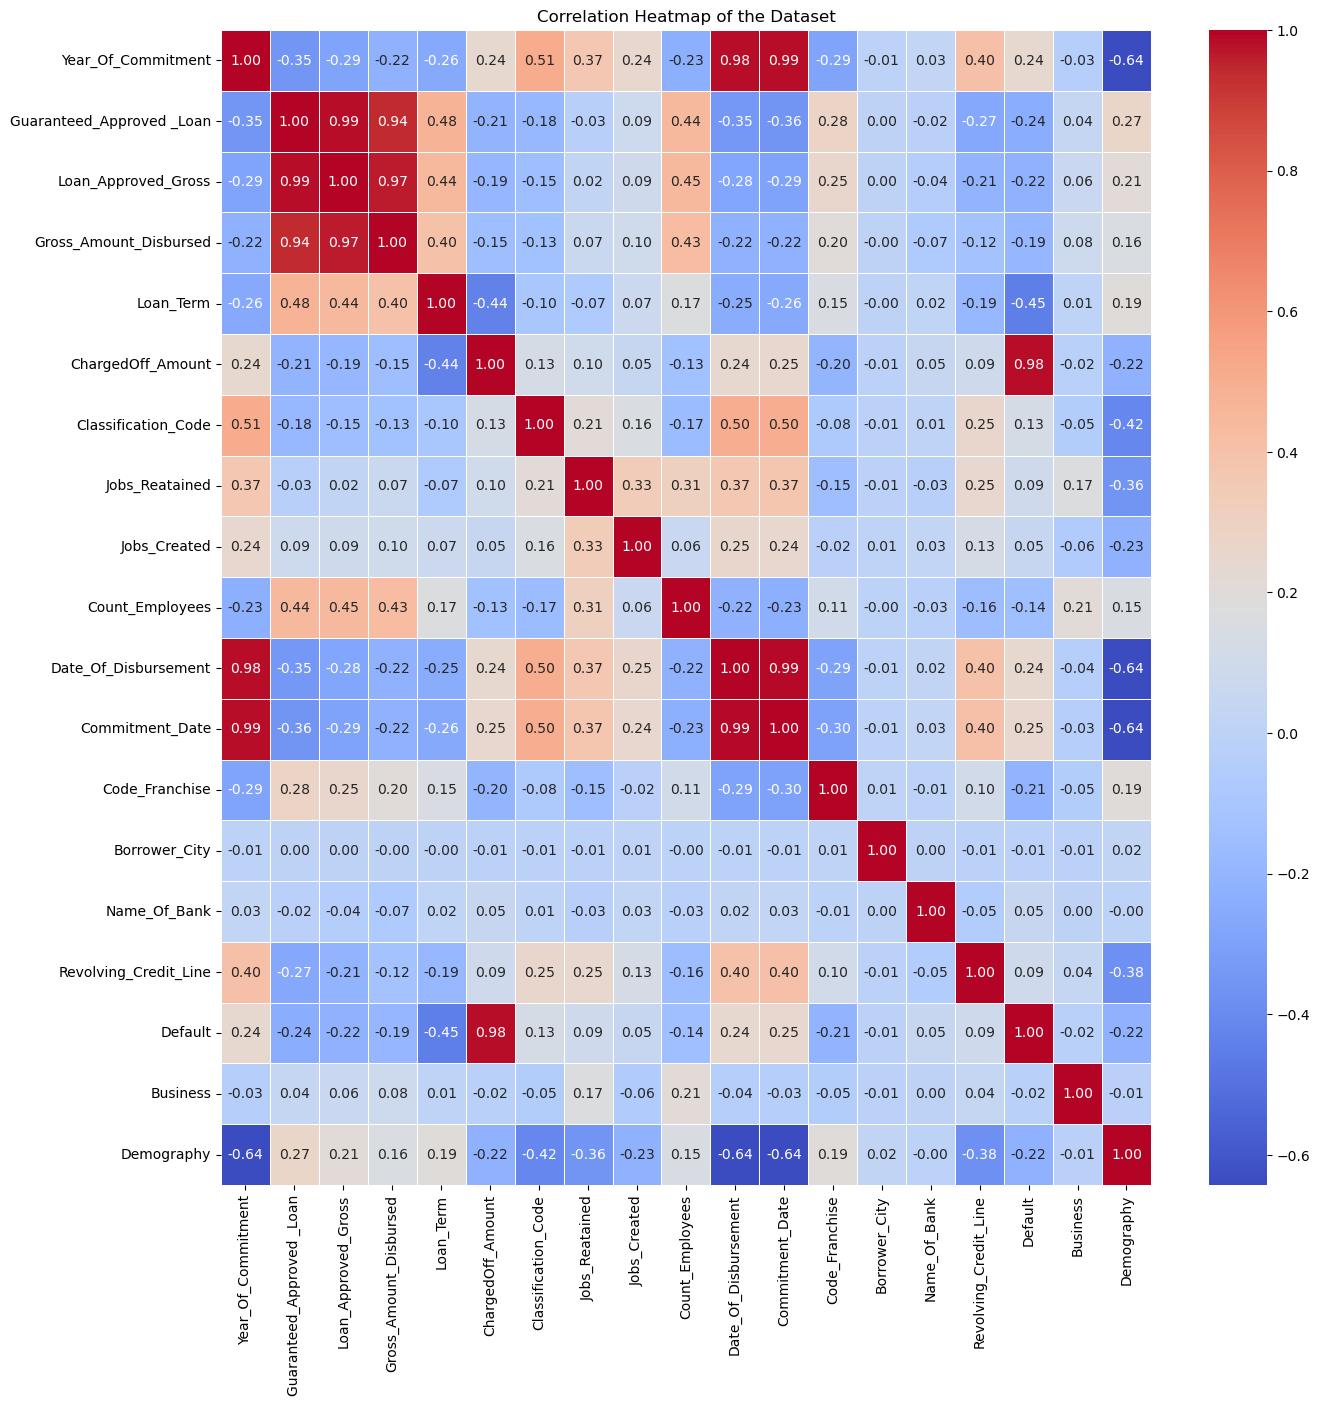

In [139]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f",linewidths=0.5)
plt.title("Correlation Heatmap of the Dataset")
plt.show()


# spiliting data to  x and y

In [141]:
#Spiliting data into features and target variable
x=df_2.drop(["Default"],axis=1)

In [142]:
y=df_2["Default"]

In [143]:
x

,Year_Of_Commitment,Guaranteed_Approved _Loan,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,ChargedOff_Amount,Classification_Code,Jobs_Reatained,Jobs_Created,Count_Employees,Date_Of_Disbursement,Commitment_Date,Code_Franchise,Borrower_City,Name_Of_Bank,Revolving_Credit_Line,Business,Demography
0,1991,17.315696,17.520263,17.520263,4.844187,0.000000,0,0.0,0.0,19.5,19910731.0,19910402.0,1.0,452,11,0,1,1
1,2006,17.303971,17.591653,17.591653,4.820282,17.460526,451120,0.0,2.5,6.0,20060430.0,20060410.0,1.0,137,13,1,0,0
2,2004,14.167857,14.861004,15.600816,4.510860,0.000000,541618,4.0,0.0,4.0,20040630.0,20040525.0,1.0,80,26,1,1,0
3,2006,14.524532,15.217679,15.217679,4.844187,0.000000,811112,9.0,1.0,7.0,20060131.0,20051221.0,0.0,12,34,1,0,0
4,2005,16.950218,17.237900,17.237900,4.653960,16.945009,722211,4.0,0.0,4.0,20041231.0,20041102.0,1.0,204,39,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,1999,15.451960,15.675103,15.675103,5.198497,0.000000,541430,0.0,0.0,1.0,19981231.0,19981029.0,1.0,440,29,1,0,1
104996,2004,15.748307,15.910826,15.910826,4.912655,0.000000,451130,0.0,0.0,2.0,20031130.0,20031002.0,1.0,1174,2,1,0,1
104997,2006,13.608242,14.301388,14.301388,3.555348,13.786388,722110,6.0,0.0,5.0,20060331.0,20060228.0,0.0,490,77,0,0,0
104998,2007,16.196004,16.196004,16.109676,5.888878,0.000000,561310,0.0,2.5,19.5,20070516.0,20070109.0,1.0,517,30,1,1,0


In [144]:
y

0         0
1         1
2         0
3         0
4         1
         ..
104995    0
104996    0
104997    1
104998    0
104999    0
Name: Default, Length: 105000, dtype: int64

# Standard Scaler

In [146]:
#importing StandardScaler from scikitlearn libaray
from sklearn.preprocessing import StandardScaler

In [147]:
scaler=StandardScaler()

In [148]:
scld_df=scaler.fit_transform(x)

In [149]:
scld_df

array([[-1.75386053,  1.39447352,  1.38984371, ..., -1.07689087,
         0.62934282,  1.10231412],
       [ 0.76127018,  1.38623054,  1.44489469, ...,  0.92845694,
        -1.5889591 , -0.90718243],
       [ 0.42591942, -0.81855801, -0.66079184, ...,  0.92845694,
         0.62934282, -0.90718243],
       ...,
       [ 0.76127018, -1.2119854 , -1.09232829, ..., -1.07689087,
        -1.5889591 , -0.90718243],
       [ 0.92894556,  0.6072945 ,  0.36866764, ...,  0.92845694,
         0.62934282, -0.90718243],
       [-0.07710672,  0.57760352,  0.46142393, ...,  0.92845694,
        -1.5889591 , -0.90718243]])

# VIF

In [151]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [152]:
vif=pd.DataFrame()
vif['vif_values']=[variance_inflation_factor(scld_df,i)for i in range (scld_df.shape[1])]
vif['features']=x.columns
vif

,vif_values,features
0,35.637859,Year_Of_Commitment
1,60.049461,Guaranteed_Approved _Loan
2,89.546307,Loan_Approved_Gross
3,19.552911,Gross_Amount_Disbursed
4,1.596715,Loan_Term
5,1.322995,ChargedOff_Amount
6,1.398404,Classification_Code
7,1.676807,Jobs_Reatained
8,1.244139,Jobs_Created
9,1.605143,Count_Employees


In [153]:
#Dropping this column because of high vif
x.drop(["Commitment_Date"],axis=1,inplace=True)

In [154]:
#Again doing standard scaler
scaler=StandardScaler()

In [155]:
scld_df=scaler.fit_transform(x)

In [156]:
scld_df

array([[-1.75386053,  1.39447352,  1.38984371, ..., -1.07689087,
         0.62934282,  1.10231412],
       [ 0.76127018,  1.38623054,  1.44489469, ...,  0.92845694,
        -1.5889591 , -0.90718243],
       [ 0.42591942, -0.81855801, -0.66079184, ...,  0.92845694,
         0.62934282, -0.90718243],
       ...,
       [ 0.76127018, -1.2119854 , -1.09232829, ..., -1.07689087,
        -1.5889591 , -0.90718243],
       [ 0.92894556,  0.6072945 ,  0.36866764, ...,  0.92845694,
         0.62934282, -0.90718243],
       [-0.07710672,  0.57760352,  0.46142393, ...,  0.92845694,
        -1.5889591 , -0.90718243]])

In [157]:
#Again Doing vif
vif=pd.DataFrame()
vif['vif_values']=[variance_inflation_factor(scld_df,i)for i in range (scld_df.shape[1])]
vif['features']=x.columns
vif

,vif_values,features
0,27.787755,Year_Of_Commitment
1,60.049008,Guaranteed_Approved _Loan
2,89.545458,Loan_Approved_Gross
3,19.551717,Gross_Amount_Disbursed
4,1.596684,Loan_Term
5,1.316611,ChargedOff_Amount
6,1.398034,Classification_Code
7,1.675508,Jobs_Reatained
8,1.241456,Jobs_Created
9,1.603914,Count_Employees


In [158]:
#vif value is high so dropping this column 
x.drop("Loan_Approved_Gross",axis=1,inplace=True)

In [159]:
scaler=StandardScaler()

In [160]:
scld_df=scaler.fit_transform(x)

In [161]:
scld_df

array([[-1.75386053,  1.39447352,  1.35402977, ..., -1.07689087,
         0.62934282,  1.10231412],
       [ 0.76127018,  1.38623054,  1.41127446, ...,  0.92845694,
        -1.5889591 , -0.90718243],
       [ 0.42591942, -0.81855801, -0.18509573, ...,  0.92845694,
         0.62934282, -0.90718243],
       ...,
       [ 0.76127018, -1.2119854 , -1.22705338, ..., -1.07689087,
        -1.5889591 , -0.90718243],
       [ 0.92894556,  0.6072945 ,  0.22293831, ...,  0.92845694,
         0.62934282, -0.90718243],
       [-0.07710672,  0.57760352,  0.38861373, ...,  0.92845694,
        -1.5889591 , -0.90718243]])

In [162]:
vif=pd.DataFrame()
vif['vif_values']=[variance_inflation_factor(scld_df,i)for i in range (scld_df.shape[1])]
vif['features']=x.columns
vif

,vif_values,features
0,27.780258,Year_Of_Commitment
1,13.612319,Guaranteed_Approved _Loan
2,11.342036,Gross_Amount_Disbursed
3,1.582417,Loan_Term
4,1.314085,ChargedOff_Amount
5,1.398023,Classification_Code
6,1.660783,Jobs_Reatained
7,1.227816,Jobs_Created
8,1.603782,Count_Employees
9,27.289274,Date_Of_Disbursement


In [163]:
x.drop("Year_Of_Commitment",axis=1,inplace=True)

In [164]:
scaler=StandardScaler()
scld_df=scaler.fit_transform(x)
scld_df

array([[ 1.39447352,  1.35402977,  0.09653995, ..., -1.07689087,
         0.62934282,  1.10231412],
       [ 1.38623054,  1.41127446,  0.06903078, ...,  0.92845694,
        -1.5889591 , -0.90718243],
       [-0.81855801, -0.18509573, -0.28703522, ...,  0.92845694,
         0.62934282, -0.90718243],
       ...,
       [-1.2119854 , -1.22705338, -1.38658558, ..., -1.07689087,
        -1.5889591 , -0.90718243],
       [ 0.6072945 ,  0.22293831,  1.29871312, ...,  0.92845694,
         0.62934282, -0.90718243],
       [ 0.57760352,  0.38861373,  0.50426048, ...,  0.92845694,
        -1.5889591 , -0.90718243]])

In [165]:
vif=pd.DataFrame()
vif['vif_values']=[variance_inflation_factor(scld_df,i)for i in range (scld_df.shape[1])]
vif['features']=x.columns
vif

,vif_values,features
0,13.593369,Guaranteed_Approved _Loan
1,11.326882,Gross_Amount_Disbursed
2,1.578751,Loan_Term
3,1.313720,ChargedOff_Amount
4,1.388773,Classification_Code
5,1.657438,Jobs_Reatained
6,1.227504,Jobs_Created
7,1.600075,Count_Employees
8,2.389552,Date_Of_Disbursement
9,1.341604,Code_Franchise


In [166]:
x.drop("Guaranteed_Approved _Loan",axis=1,inplace=True)

In [167]:
scaler=StandardScaler()
scld_df=scaler.fit_transform(x)
scld_df

array([[ 1.35402977,  0.09653995, -0.62167308, ..., -1.07689087,
         0.62934282,  1.10231412],
       [ 1.41127446,  0.06903078,  1.98951121, ...,  0.92845694,
        -1.5889591 , -0.90718243],
       [-0.18509573, -0.28703522, -0.62167308, ...,  0.92845694,
         0.62934282, -0.90718243],
       ...,
       [-1.22705338, -1.38658558,  1.44005166, ..., -1.07689087,
        -1.5889591 , -0.90718243],
       [ 0.22293831,  1.29871312, -0.62167308, ...,  0.92845694,
         0.62934282, -0.90718243],
       [ 0.38861373,  0.50426048, -0.62167308, ...,  0.92845694,
        -1.5889591 , -0.90718243]])

In [168]:
vif=pd.DataFrame()
vif['vif_values']=[variance_inflation_factor(scld_df,i)for i in range (scld_df.shape[1])]
vif['features']=x.columns
vif


,vif_values,features
0,1.488151,Gross_Amount_Disbursed
1,1.503051,Loan_Term
2,1.313672,ChargedOff_Amount
3,1.387004,Classification_Code
4,1.642031,Jobs_Reatained
5,1.208537,Jobs_Created
6,1.583432,Count_Employees
7,2.338854,Date_Of_Disbursement
8,1.259673,Code_Franchise
9,1.000855,Borrower_City


# Train Test Split

In [170]:
#importing train_test_split from scikitlearn library
from sklearn.model_selection import train_test_split

In [171]:
x_train,x_test,y_train,y_test=train_test_split(scld_df,y,test_size=0.25,random_state=24)

In [172]:
x_train

array([[-0.49231797, -0.3256113 ,  1.65409815, ...,  0.92845694,
         0.62934282, -0.90718243],
       [ 0.08719002,  1.29871312, -0.62167308, ..., -1.07689087,
         0.62934282,  1.10231412],
       [-0.49231797, -0.86646579,  1.60945606, ...,  0.92845694,
         0.62934282,  1.10231412],
       ...,
       [-0.16719231,  0.50426048, -0.62167308, ..., -1.07689087,
         0.62934282,  1.10231412],
       [-1.78285899,  0.09653995, -0.62167308, ...,  0.92845694,
        -1.5889591 , -0.90718243],
       [ 1.37773175,  1.29871312, -0.62167308, ..., -1.07689087,
         0.62934282,  1.10231412]])

In [173]:
y_train

85608    1
46468    0
59510    1
68133    0
97103    0
        ..
21633    0
59537    0
85393    0
80064    0
899      0
Name: Default, Length: 78750, dtype: int64

# Machine Learning

# Logistic Regression

In [176]:
#Importing logistic Regression , accuracy_score , classification_report , confusion_matrixfrom scikitlearn library 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score , recall_score , precision_score

In [177]:
lr=LogisticRegression()

In [178]:
lr.fit(x_train,y_train)

LogisticRegression()

In [179]:
# Making Predictions
y_train_pred =lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [180]:
# Obtaining Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [181]:
#accuracy of training data
train_accuracy

0.9939174603174603

In [182]:
#accuracy of testing data
test_accuracy

0.993904761904762

classification_report

In [184]:
classification_report(y_test,y_test_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      1.00     19069\n           1       0.98      1.00      0.99      7181\n\n    accuracy                           0.99     26250\n   macro avg       0.99      0.99      0.99     26250\nweighted avg       0.99      0.99      0.99     26250\n'

confusion_matrix

In [186]:
confusion_matrix(y_test, y_test_pred)

array([[18939,   130],
       [   30,  7151]], dtype=int64)

f1_score

In [188]:
f1_score(y_test,y_test_pred)

0.9889365233024477

Recall

In [190]:
recall_score(y_test,y_test_pred)

0.9958223088706308

precision

In [192]:
precision_score(y_test,y_test_pred)

0.9821453097102046

# KNN

In [194]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [195]:
knn = KNeighborsClassifier()

In [205]:
grid_1={'algorithm':['kd_tree','bruts'],
        'leaf_size':[3,4,10,12,20],
        'n_neighbors':[4,10,5,12]}

In [207]:
grid_search = GridSearchCV(estimator=knn, param_grid=grid_1)

In [ ]:
grid_search.fit(x_train,y_train)

In [ ]:
grid_search.best_estimator

In [ ]:
# Training Model
knn.fit(x_train, y_train)

In [ ]:
# Making Predictions
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

In [ ]:
#obtaining acuuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [ ]:
#accuracy of trainig data
train_accuracy

In [ ]:
test_accuracy 

classificatiion report

In [ ]:
classification_report(y_test,y_test_pred)

Confusion matrix

In [ ]:
confusion_matrix(y_test, y_test_pred)

F1_score

In [ ]:
f1_score(y_test,y_test_pred)

Recall

In [ ]:
recall_score(y_test,y_test_pred)

precision

In [ ]:
precision_score(y_test,y_test_pred)

# Random Forest

Importing neccessary libaries and there classes

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score, confusion_matrix, classification_report

In [ ]:
rf = RandomForestClassifier()

In [ ]:
# Train model
rf.fit(x_train, y_train)

In [ ]:
# Predict on training and testing sets
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

In [ ]:
# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [ ]:
train_accuracy

In [ ]:
test_accuracy

F1 score

In [ ]:
f1_score(y_test, y_test_pred)

precision

In [ ]:
precision_score(y_test, y_test_pred)

Recall

In [ ]:
recall_score(y_test, y_test_pred)

Confusion Matrix

In [ ]:
confusion_matrix(y_test, y_test_pred)

Classification Report

In [ ]:
classification_report(y_test, y_test_pred)

# Decision Tree

Importing neccessary libaries and there classes

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

In [ ]:
# Creating Decision Tree model
dt = DecisionTreeClassifier()

In [ ]:
# Train model
dt.fit(x_train, y_train)


In [ ]:
# Making Prediction
y_test_pred = dt.predict(x_test)
y_train_pred = dt.predict(x_train)

In [ ]:
# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [ ]:
test_accuracy

F1_score

In [ ]:
f1_score(y_test, y_test_pred)

Precision

In [ ]:
precision_score(y_test, y_test_pred)

Recall

In [ ]:
recall_score(y_test, y_test_pred)

confusion Matrix

In [ ]:
confusion_matrix(y_test, y_test_pred)

Classifiation report

In [ ]:
classification_report(y_test, y_test_pred)

#                                                          The End